In [1]:
!pip install -q factor_analyzer


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from factor_analyzer import FactorAnalyzer as Fa

#### Carregando o Wine Dataset

In [3]:
data_wine=pd.read_csv("winequality-red.csv")

In [4]:
data_wine.head()
df_wine=data_wine.copy()
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
serial_num = pd.RangeIndex(start=1, stop=len(df_wine.index) + 1, step=1)
df_wine['No.'] = serial_num
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,No.
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,4
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1595
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1596
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1597
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1598


In [8]:
df_wine=df_wine.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
df_wine

,No.,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,2,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,3,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,4,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
No = df_wine['No.']
df_wine= df_wine.set_index(No)
df_wine.drop('No.', axis=1, inplace=True)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
No.,,,,,,,,,,,,
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Pré processamento dos dados 

**Verificando Nulos**

In [44]:
def nulls(df):
    """
    Calcula a quantidade de valores nulos em cada coluna de um DataFrame
    e retorna um DataFrame estilizado destacando colunas com nulos.

    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.

    Retorna:
        pd.DataFrame ou Styler: Um DataFrame com a contagem de valores nulos por coluna,
        estilizado com destaque para colunas que possuem valores nulos.
    """
    # Calcula a contagem de valores nulos por coluna
    df_null = df.isnull().sum().to_frame(name="Valores Nulos")
    
    # Adiciona a porcentagem de nulos em relação ao total de linhas
    df_null["% Nulos"] = (df_null["Valores Nulos"] / len(df)) * 100

    # Função para destacar células com nulos
    def destacar_nulos(val):
        color = "lightcoral" if val > 0 else ""
        return f"background-color: {color}"
    
    # Retorna o DataFrame estilizado
    return df_null.style.applymap(destacar_nulos, subset=["% Nulos"])


In [45]:
df_null = nulls(df_wine)
df_null

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\1562056047.py:25: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df_null.style.applymap(destacar_nulos, subset=["% Nulos"])


,Valores Nulos,% Nulos
fixed acidity,0,0.000000
volatile acidity,0,0.000000
citric acid,0,0.000000
residual sugar,0,0.000000
chlorides,0,0.000000
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,0,0.000000
sulphates,0,0.000000


#### Verificando e tratando os Outliers

In [10]:
# Transformar o dataframe para formato longo (necessário para seaborn.boxplot)
df_long = df_wine.melt(var_name='Colunas', value_name='Valores')


C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\3621697276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Colunas', y='Valores', data=df_long, palette='magma_r')


Text(0, 0.5, 'Valores')

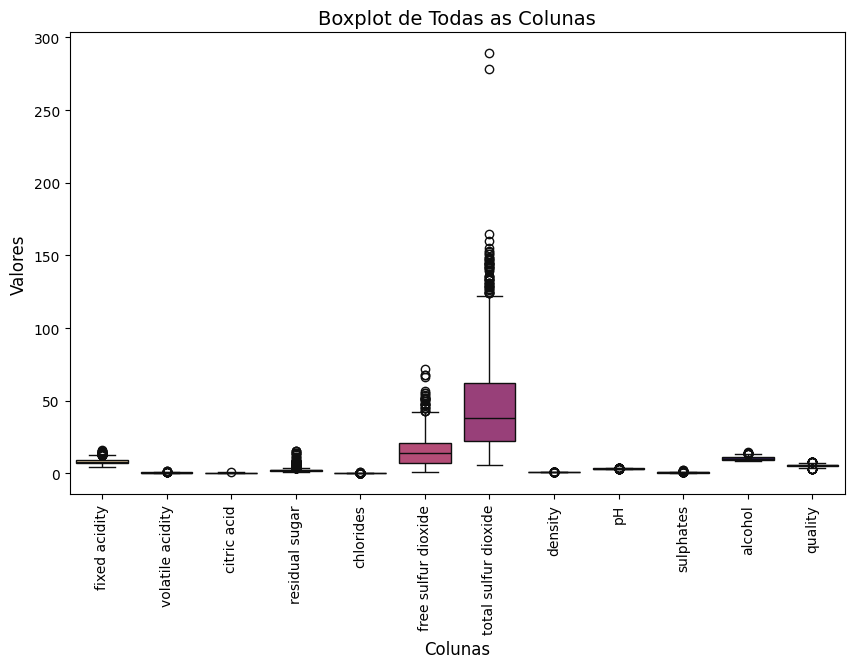

In [11]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico
sns.boxplot(x='Colunas', y='Valores', data=df_long, palette='magma_r')

# Configurar título e rótulos
plt.title('Boxplot de Todas as Colunas', fontsize=14)
plt.xlabel('Colunas', fontsize=12)
# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)
plt.ylabel('Valores', fontsize=12)

**Aplicando a transformação logarítimica para transformar as colunas em uma distribuição normal**

In [29]:
df_wine_log= np.log(df_wine + 0.01)
df_wine_log 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
No.,,,,,,,,,,,,
1,2.002830,-0.342490,-4.605170,0.647103,-2.453408,2.398804,3.526655,0.007770,1.258461,-0.562119,2.241773,1.611436
2,2.055405,-0.116534,-4.605170,0.959350,-2.225624,3.219276,4.204842,0.006777,1.166271,-0.371064,2.283402,1.611436
3,2.055405,-0.261365,-2.995732,0.837248,-2.282782,2.708717,3.989169,0.006976,1.184790,-0.415515,2.283402,1.611436
4,2.416806,-1.237874,-0.562119,0.647103,-2.465104,2.833801,4.094511,0.007968,1.153732,-0.527633,2.283402,1.793425
5,2.002830,-0.342490,-4.605170,0.647103,-2.453408,2.398804,3.526655,0.007770,1.258461,-0.562119,2.241773,1.611436
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1.826161,-0.494296,-2.407946,0.698135,-2.302585,3.466048,3.784417,0.004888,1.241269,-0.527633,2.352327,1.611436
1596,1.776646,-0.579818,-2.207275,0.792993,-2.631089,3.663818,3.932022,0.005107,1.261298,-0.261365,2.416806,1.793425
1597,1.842136,-0.653926,-1.966113,0.837248,-2.453408,3.367641,3.689129,0.005724,1.232560,-0.274437,2.398804,1.793425


In [30]:
# Transformar o dataframe para formato longo (necessário para seaborn.boxplot)
df_long = df_wine_log.melt(var_name='Colunas', value_name='Valores')


C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\3621697276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Colunas', y='Valores', data=df_long, palette='magma_r')


Text(0, 0.5, 'Valores')

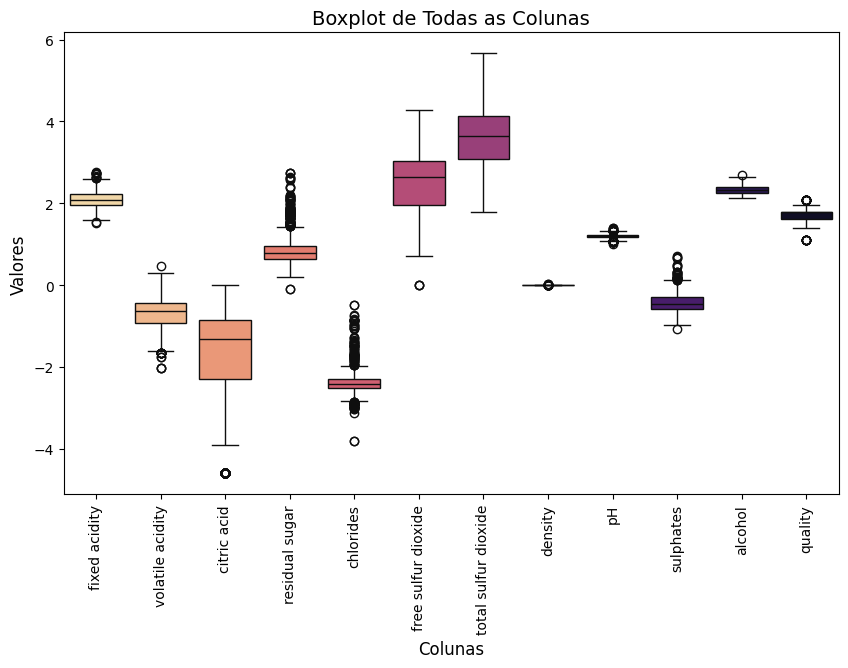

In [50]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico
sns.boxplot(x='Colunas', y='Valores', data=df_long, palette='magma_r')

# Configurar título e rótulos
plt.title('Boxplot de Todas as Colunas', fontsize=14)
plt.xlabel('Colunas', fontsize=12)
# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)
plt.ylabel('Valores', fontsize=12)

In [51]:
import pandas as pd

def calcular_outliers(df, style=False):
    """
    Calcula a contagem e o percentual de valores outliers em cada coluna numérica de um DataFrame.
    Adiciona uma opção para estilizar o DataFrame com destaque para valores na coluna "Outliers %" > 20.
    
    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.
        style (bool): Se True, retorna o DataFrame estilizado. Default é False.
    
    Retorna:
        pd.DataFrame ou Styler: Um DataFrame com a contagem e o percentual de outliers por variável, 
        ou um Styler com destaque visual.
    """
    resultados = []
    total_linhas = len(df)
    
    for coluna in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular os limites
        q1 = df[coluna].quantile(0.25)
        q3 = df[coluna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        
        # Contar outliers
        count = ((df[coluna] < limite_inferior) | (df[coluna] > limite_superior)).sum()
        percent = (count / total_linhas) * 100
        
        # Adicionar resultados
        resultados.append({"Variável": coluna, "Outliers": count, "Outliers %": percent})
    
    # Criar DataFrame consolidado
    df_resultado = pd.DataFrame(resultados).set_index("Variável")
    
    if not style:
        return df_resultado
    else:
        # Estilo para valores maiores que 20% na coluna "Outliers %"
        def destacar_outliers(val):
            color = "lightcoral" if val > 20 else ""
            return f"background-color: {color}"
        
        return df_resultado.style.applymap(
            destacar_outliers, subset=["Outliers %"]
        )


In [52]:
df_outliers = calcular_outliers(df_wine_log, style=False)
df_outliers

,Outliers,Outliers %
Variável,,
fixed acidity,14,0.875547
volatile acidity,16,1.000625
citric acid,132,8.255159
residual sugar,121,7.567230
chlorides,112,7.004378
free sulfur dioxide,3,0.187617
total sulfur dioxide,0,0.000000
density,45,2.814259
pH,37,2.313946


In [53]:
df_outliers = calcular_outliers(df_wine_log, style=True)
df_outliers

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\3998109284.py:45: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df_resultado.style.applymap(


,Outliers,Outliers %
Variável,,
fixed acidity,14,0.875547
volatile acidity,16,1.000625
citric acid,132,8.255159
residual sugar,121,7.567230
chlorides,112,7.004378
free sulfur dioxide,3,0.187617
total sulfur dioxide,0,0.000000
density,45,2.814259
pH,37,2.313946


**Truncando os valores dos outliers para o maximo e o mínimo dos boxplots**


**Tratando os valores dos outliers com o MIECE**

In [ ]:
def substituir_outliers(df):
    """
    Substitui os valores outliers das colunas numéricas de um DataFrame
    pelos valores máximos e mínimos baseados nos limites do boxplot (IQR).
    
    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.
    
    Retorna:
        pd.DataFrame: O DataFrame com os outliers substituídos.
    """
    df_corrigido = df.copy()
    for coluna in df_corrigido.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular os limites
        q1 = df_corrigido[coluna].quantile(0.25)
        q3 = df_corrigido[coluna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        
        # Substituir outliers abaixo do limite inferior
        df_corrigido[coluna] = df_corrigido[coluna].apply(
            lambda x: limite_inferior if x < limite_inferior else limite_superior if x > limite_superior else x
        )
    return df_corrigido

In [18]:
import numpy as np
import pandas as pd
from statsmodels.imputation.mice import MICEData

def substituir_outliers_com_mice(df):
    """
    Substitui os valores outliers das colunas numéricas de um DataFrame por NaN
    e preenche os NaNs utilizando o método MICE (Multiple Imputation by Chained Equations).
    
    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.
    
    Retorna:
        pd.DataFrame: O DataFrame com os outliers substituídos e preenchidos.
    """
    df_corrigido = df.copy()
    
    for coluna in df_corrigido.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular os limites
        q1 = df_corrigido[coluna].quantile(0.25)
        q3 = df_corrigido[coluna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        
        # Substituir outliers por NaN
        df_corrigido[coluna] = df_corrigido[coluna].apply(
            lambda x: np.nan if x < limite_inferior or x > limite_superior else x
        )
    
    # Aplicar MICE para preencher os NaNs
    mice_data = MICEData(df_corrigido)
    df_preenchido = mice_data.data  # Retorna o DataFrame preenchido
    
    return df_preenchido


In [58]:
df_wine_log= substituir_outliers_com_mice(df_wine_log)
df_wine_log

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2.002830,-0.342490,-1.469676,0.647103,-2.453408,2.398804,3.526655,0.007770,1.258461,-0.562119,2.241773,1.611436
1,2.055405,-0.116534,-1.469676,0.959350,-2.225624,3.219276,4.204842,0.006777,1.166271,-0.371064,2.283402,1.611436
2,2.055405,-0.261365,-2.995732,0.837248,-2.282782,2.708717,3.989169,0.006976,1.184790,-0.415515,2.283402,1.611436
3,2.416806,-1.237874,-0.562119,0.647103,-2.465104,2.833801,4.094511,0.007968,1.153732,-0.527633,2.283402,1.793425
4,2.002830,-0.342490,-1.469676,0.647103,-2.453408,2.398804,3.526655,0.007770,1.258461,-0.562119,2.241773,1.611436
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.826161,-0.494296,-2.407946,0.698135,-2.302585,3.466048,3.784417,0.004888,1.241269,-0.527633,2.352327,1.611436
1595,1.776646,-0.579818,-2.207275,0.792993,-2.631089,3.663818,3.932022,0.005107,1.261298,-0.261365,2.416806,1.793425
1596,1.842136,-0.653926,-1.966113,0.837248,-2.453408,3.367641,3.689129,0.005724,1.232560,-0.274437,2.398804,1.793425
1597,1.776646,-0.423120,-2.040221,0.698135,-2.465104,3.466048,3.784417,0.005455,1.275363,-0.328504,2.323368,1.611436


In [59]:
# Transformar o dataframe para formato longo (necessário para seaborn.boxplot)
df_long = df_wine_log.melt(var_name='Colunas', value_name='Valores')


C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\3621697276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Colunas', y='Valores', data=df_long, palette='magma_r')


Text(0, 0.5, 'Valores')

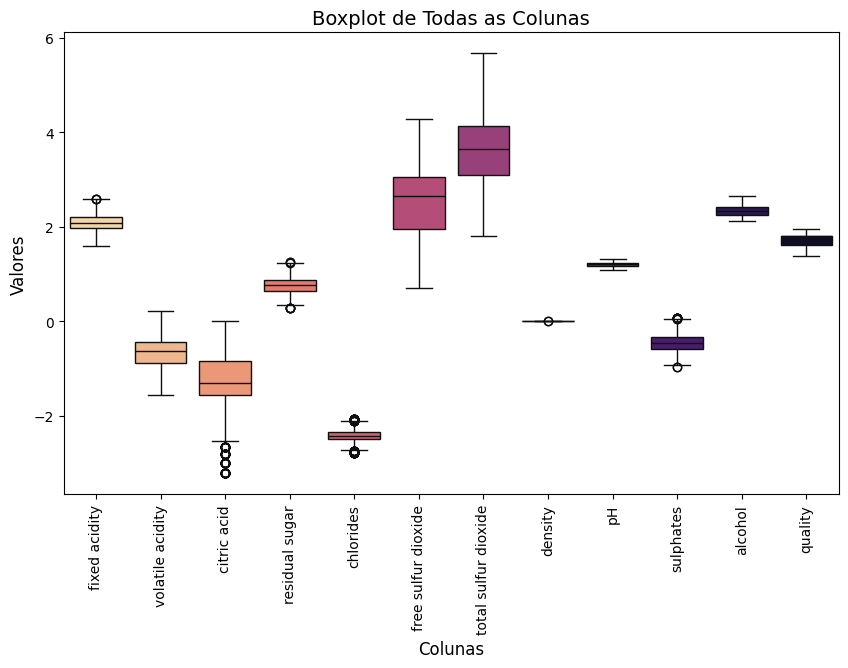

In [60]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar o gráfico
sns.boxplot(x='Colunas', y='Valores', data=df_long, palette='magma_r')

# Configurar título e rótulos
plt.title('Boxplot de Todas as Colunas', fontsize=14)
plt.xlabel('Colunas', fontsize=12)
# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90)
plt.ylabel('Valores', fontsize=12)

In [61]:
import pandas as pd

def calcular_outliers(df, style=False):
    """
    Calcula a contagem e o percentual de valores outliers em cada coluna numérica de um DataFrame.
    Adiciona uma opção para estilizar o DataFrame com destaque para valores na coluna "Outliers %" > 20.
    
    Parâmetros:
        df (pd.DataFrame): O DataFrame contendo os dados.
        style (bool): Se True, retorna o DataFrame estilizado. Default é False.
    
    Retorna:
        pd.DataFrame ou Styler: Um DataFrame com a contagem e o percentual de outliers por variável, 
        ou um Styler com destaque visual.
    """
    resultados = []
    total_linhas = len(df)
    
    for coluna in df.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular os limites
        q1 = df[coluna].quantile(0.25)
        q3 = df[coluna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr
        
        # Contar outliers
        count = ((df[coluna] < limite_inferior) | (df[coluna] > limite_superior)).sum()
        percent = (count / total_linhas) * 100
        
        # Adicionar resultados
        resultados.append({"Variável": coluna, "Outliers": count, "Outliers %": percent})
    
    # Criar DataFrame consolidado
    df_resultado = pd.DataFrame(resultados).set_index("Variável")
    
    if not style:
        return df_resultado
    else:
        # Estilo para valores maiores que 20% na coluna "Outliers %"
        def destacar_outliers(val):
            color = "lightcoral" if val > 20 else ""
            return f"background-color: {color}"
        
        return df_resultado.style.applymap(
            destacar_outliers, subset=["Outliers %"]
        )


In [63]:
df_outliers = calcular_outliers(df_wine_log, style=False)
df_outliers

,Outliers,Outliers %
Variável,,
fixed acidity,3,0.187617
volatile acidity,0,0.000000
citric acid,103,6.441526
residual sugar,8,0.500313
chlorides,57,3.564728
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,2,0.125078
pH,0,0.000000


In [28]:
df_outliers = calcular_outliers(df_wine_log, style=True)
df_outliers

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\3998109284.py:45: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return df_resultado.style.applymap(


,Outliers,Outliers %
Variável,,
fixed acidity,0,0.000000
volatile acidity,0,0.000000
citric acid,0,0.000000
residual sugar,0,0.000000
chlorides,0,0.000000
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,0,0.000000


#### Padronizando os dados com o StandardardScaler

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_wine_sc =  scaler.fit_transform(df_wine_log)
df_wine_sc

array([[-0.48426903,  1.00328828, -0.18398381, ..., -0.61455873,
        -0.99625262, -0.83728459],
       [-0.20811838,  1.69986966, -0.18398381, ...,  0.40605709,
        -0.57301808, -0.83728459],
       [-0.20811838,  1.25338308, -2.4915181 , ...,  0.16859607,
        -0.57301808, -0.83728459],
       ...,
       [-1.32832733,  0.04318916, -0.934641  , ...,  0.92223702,
         0.60024094,  0.54513541],
       [-1.67231644,  0.75472197, -1.04669892, ...,  0.63341027,
        -0.16670061, -0.83728459],
       [-1.58418423, -1.45354014,  0.92847098, ...,  0.24892831,
         0.60024094,  0.54513541]])

In [65]:
df_wine_sc = pd.DataFrame(df_wine_sc, columns=list(df_wine.columns))
df_wine_sc= df_wine_sc.set_index(No)
df_wine_sc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
No.,,,,,,,,,,,,
1,-0.484269,1.003288,-0.183984,-0.644230,-0.221426,-0.226691,-0.105565,0.666011,1.414316,-0.614559,-0.996253,-0.837285
2,-0.208118,1.699870,-0.183984,1.063619,1.403445,0.987988,0.856494,0.039778,-0.800453,0.406057,-0.573018,-0.837285
3,-0.208118,1.253383,-2.491518,0.395773,0.995712,0.232123,0.550547,0.165074,-0.355552,0.168596,-0.573018,-0.837285
4,1.690162,-1.757012,1.188324,-0.644230,-0.304858,0.417307,0.699982,0.791183,-1.101698,-0.430334,-0.573018,0.545135
5,-0.484269,1.003288,-0.183984,-0.644230,-0.221426,-0.226691,-0.105565,0.666011,1.414316,-0.614559,-0.996253,-0.837285


#### Verificando a Correlação dos dados 

In [66]:
# Calcular a matriz de correlação de Pearson
matriz_corr = df_wine_sc.corr(method='pearson')

In [21]:
# Aplicar estilo de heatmap ao DataFrame
matriz_corr_ = np.round(matriz_corr,2)
styled_df = matriz_corr_.style.background_gradient(cmap='magma_r')

# Exibir o DataFrame com estilo aplicado
styled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.270000,0.560000,0.220000,0.250000,-0.180000,-0.110000,0.680000,-0.710000,0.200000,-0.100000,0.120000
volatile acidity,-0.270000,1.000000,-0.530000,0.050000,0.160000,0.040000,0.100000,0.030000,0.230000,-0.310000,-0.230000,-0.390000
citric acid,0.560000,-0.530000,1.000000,0.160000,0.110000,-0.030000,0.100000,0.310000,-0.510000,0.270000,0.030000,0.180000
residual sugar,0.220000,0.050000,0.160000,1.000000,0.210000,0.070000,0.140000,0.430000,-0.090000,0.040000,0.110000,0.020000
chlorides,0.250000,0.160000,0.110000,0.210000,1.000000,-0.010000,0.100000,0.420000,-0.260000,0.110000,-0.320000,-0.180000
free sulfur dioxide,-0.180000,0.040000,-0.030000,0.070000,-0.010000,1.000000,0.790000,-0.040000,0.100000,0.050000,-0.090000,-0.040000
total sulfur dioxide,-0.110000,0.100000,0.100000,0.140000,0.100000,0.790000,1.000000,0.110000,-0.020000,0.040000,-0.240000,-0.160000
density,0.680000,0.030000,0.310000,0.430000,0.420000,-0.040000,0.110000,1.000000,-0.340000,0.170000,-0.500000,-0.170000
pH,-0.710000,0.230000,-0.510000,-0.090000,-0.260000,0.100000,-0.020000,-0.340000,1.000000,-0.130000,0.200000,-0.060000
sulphates,0.200000,-0.310000,0.270000,0.040000,0.110000,0.050000,0.040000,0.170000,-0.130000,1.000000,0.160000,0.330000


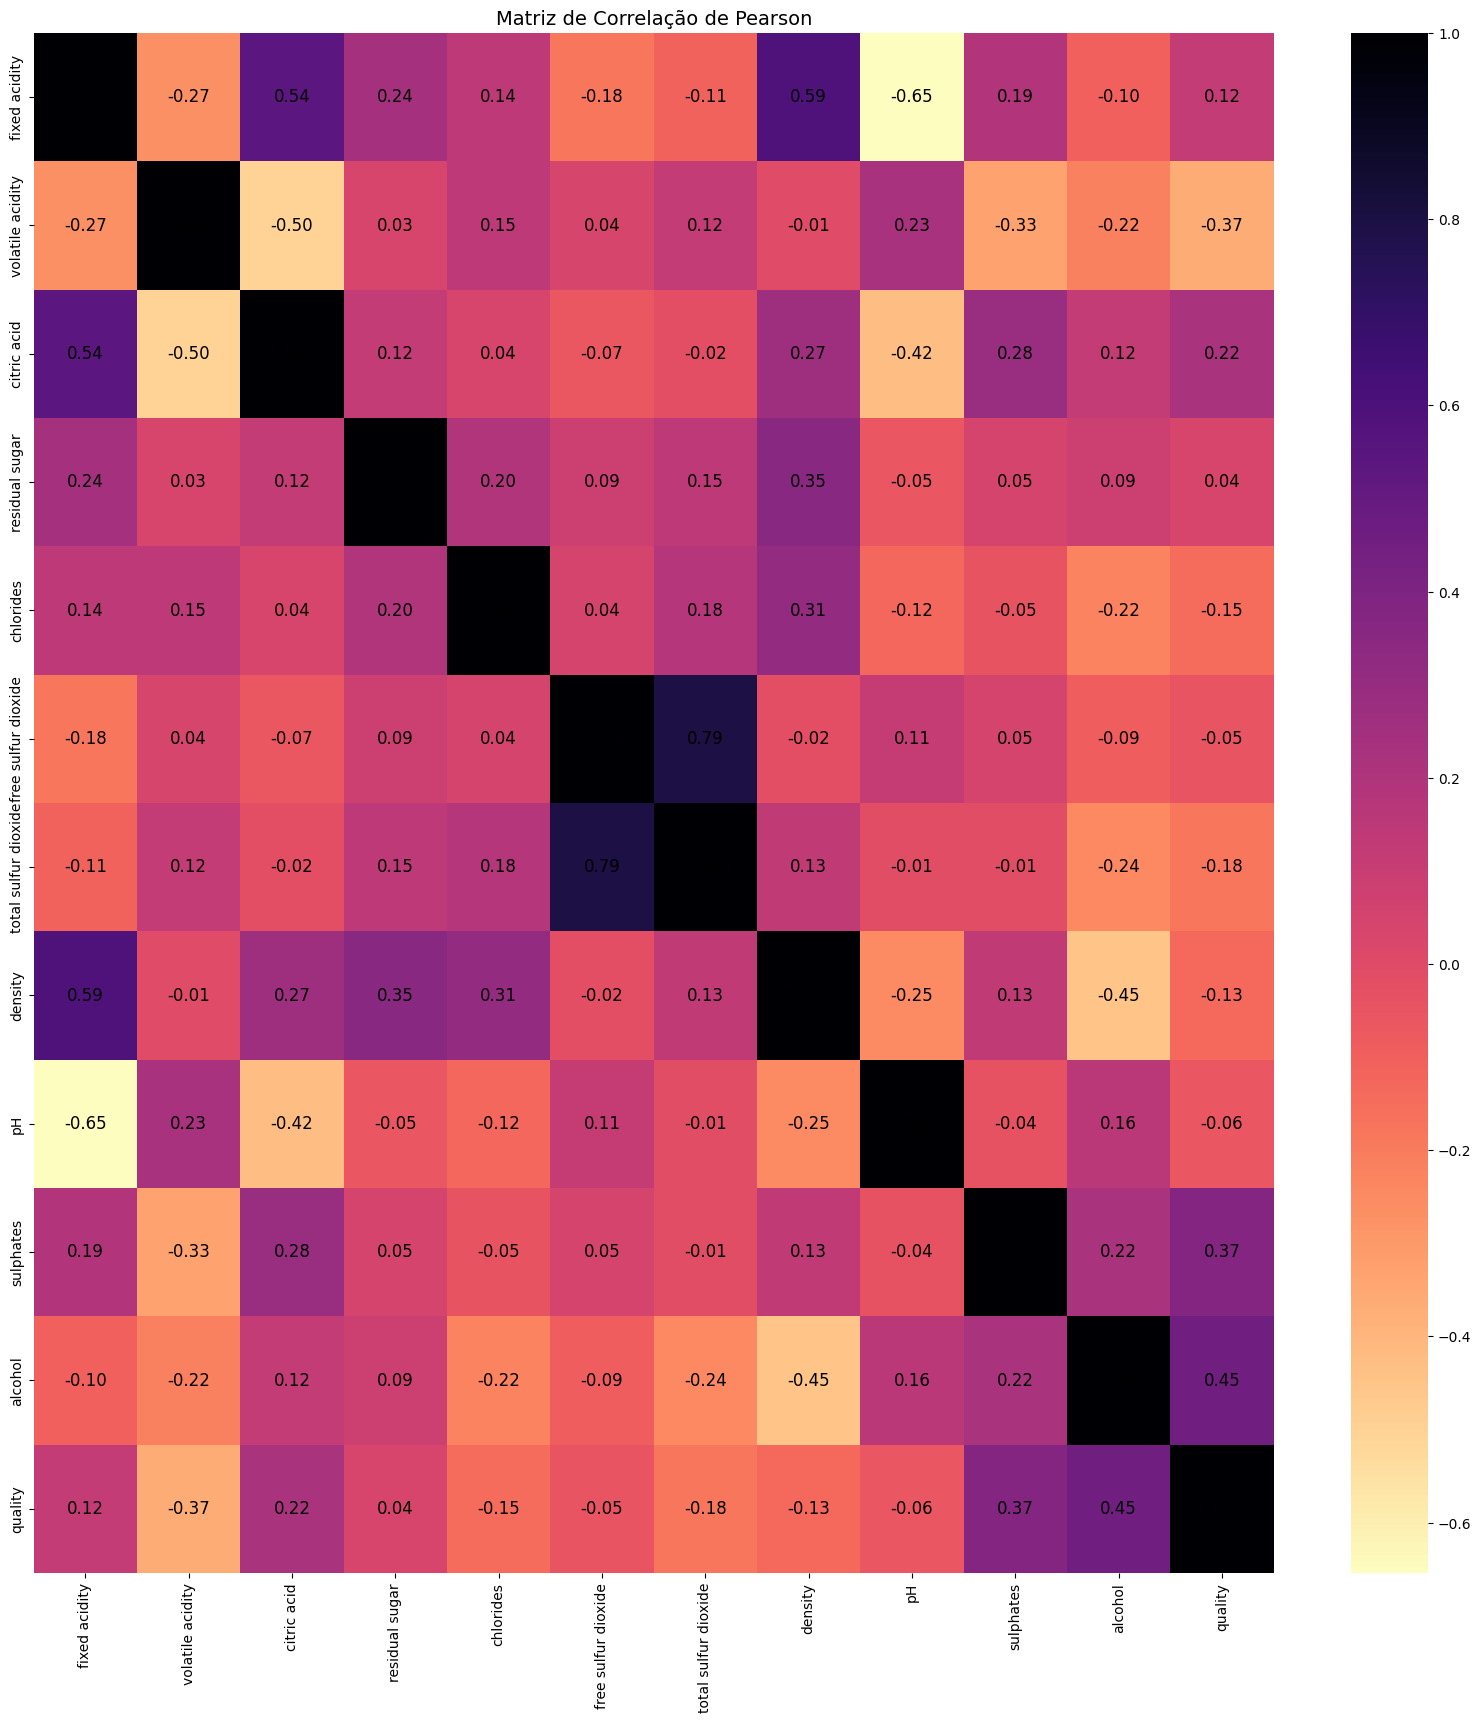

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configurar o tamanho do gráfico
plt.figure(figsize=(20, 20))

# Criar o heatmap com anotações personalizadas
sns.heatmap(
    matriz_corr,
    cmap="magma_r",  # Paleta de cores
    annot=True,  # Exibir valores de correlação
    annot_kws={"color": "black", "fontsize": 12},  # Configurações da fonte
    fmt=".2f"  # Formato dos valores (2 casas decimais)
)

# Configurações do título
plt.title("Matriz de Correlação de Pearson", fontsize=14)
plt.show()

## Análise Fatorial 

A análise fatorial é uma técnica estatística utilizada para explorar e identificar as relações subjacentes entre um conjunto de variáveis observadas. O objetivo principal é reduzir a complexidade dos dados, identificando um número menor de fatores que explicam a variação observada nas variáveis. Esses fatores são considerados variáveis latentes, ou seja, não observadas diretamente, mas que influenciam as variáveis mensuráveis.

**Objetivos da Análise Fatorial**

**1.  Redução de Dimensionalidade:**

* Reduz um grande número de variáveis em um número menor de fatores, facilitando a análise e a interpretação dos dados.

**2. Identificação de Estruturas Subjacentes:**

* Identificar padrões ou fatores comuns que podem explicar a variabilidade nas variáveis observadas.

**3. Simplificação de Dados:**

* Melhorar a interpretabilidade dos dados, destacando dimensões mais importantes.

**Análise Fatorial X PCA**

A Análise Fatorial (AF) e a Análise de Componentes Principais (PCA) são ambas técnicas de redução de dimensionalidade, mas têm objetivos, métodos e interpretações diferentes. Aqui estão as principais diferenças entre elas:

**1. Objetivo**

* Análise Fatorial (AF):

    * O principal objetivo da análise fatorial é identificar fatores latentes que explicam as correlações entre as variáveis observadas. 
    
    * Esses fatores são variáveis não observadas que influenciam as variáveis medidas diretamente.
    
    * A AF é usada quando se acredita que as variáveis observadas são influenciadas por um conjunto menor de fatores subjacentes (latentes). A análise busca modelar essas relações.

* PCA (Principal Component Analysis):

  * O PCA tem como objetivo reduzir a dimensionalidade dos dados projetando-os em um novo sistema de coordenadas, denominado componentes principais. 
  
  * Ele cria novas variáveis (componentes) que são combinações lineares das variáveis originais.

  * O PCA busca maximizar a variância explicada pelos componentes, sem se preocupar com a interpretação subjacente das variáveis. 
  
  * Ele se concentra na redução de dados mantendo o maior valor possível de variância.

**2. Natureza das Variáveis**

* Análise Fatorial (AF):

  * Trata das variáveis observadas como manifestação de fatores latentes subjacentes. 
  
  * As variáveis observadas são consideradas influenciadas por esses fatores.
  
  * A AF busca identificar essas relações causais entre variáveis e fatores latentes.


* PCA (Principal Component Analysis):

  * O PCA não assume qualquer estrutura latente subjacente nas variáveis. 
  
  * Ele simplesmente projeta os dados em um novo espaço, sem considerar causas subjacentes.

  * Os componentes principais não são interpretados como fatores latentes, mas como combinações lineares das variáveis originais que maximizam a variância.

**3. Modelo Matemático**

* Análise Fatorial (AF):

  * A AF usa um modelo probabilístico, onde as variáveis observadas são expressas como funções dos fatores latentes (com erros).

  * O modelo fatorial pode ser representado por:

$$X=ΛF+ϵ$$

Onde: 

* X: são as variáveis observadas, 
* Λ: é a matriz de cargas fatoriais (associando variáveis aos fatores), 
* F: é a matriz de fatores latentes e 
* ϵ: é o erro.

* PCA (Principal Component Analysis):

  * O PCA é uma técnica matemática que decompõe a matriz de covariância dos dados em componentes principais. 

  * Cada componente é uma combinação linear das variáveis originais.

  * O PCA não assume um modelo de erro ou um fator latente, apenas projeta os dados em novas direções que maximizam a variância.

**4. Cálculo e Técnica**

* Análise Fatorial (AF):

  * A AF utiliza métodos como Máxima Verossimilhança ou Métodos de Componentes Principais para extrair os fatores. 
  
  * A rotação dos fatores (como Varimax ou Promax) também é utilizada para tornar a interpretação dos fatores mais fácil.

  * Os fatores latentes são identificados de forma a minimizar o erro de aproximação das variáveis observadas.


* PCA (Principal Component Analysis):

  * O PCA utiliza autovalores e autovetores da matriz de covariância ou correlação para calcular os componentes principais.
  
  * Os componentes principais são ordernados pela variância que explicam nos dados, com o primeiro componente explicando a maior variância, o segundo a segunda maior, e assim por diante.

**5. Interpretação dos Resultados**

* Análise Fatorial (AF):

  * Os fatores latentes são interpretados com base nas cargas fatoriais, que indicam o grau de associação entre cada variável e o fator. 
  
  * Cada fator é uma construção teórica, e as variáveis que mais contribuem para cada fator são usadas para interpretá-lo.


* PCA (Principal Component Analysis):

  * Os componentes principais são combinações lineares das variáveis observadas, e as cargas representam a contribuição de cada variável para cada componente. 
  
  * No entanto, os componentes principais geralmente não têm uma interpretação direta como fatores latentes, pois não têm um significado causal subjacente.

**6. Relação entre Variáveis**


* Análise Fatorial (AF):

  * A AF assume que as variáveis observadas são correlacionadas devido à influência de fatores latentes comuns. 
  
  * Ou seja, as variáveis são correlacionadas porque dependem dos mesmos fatores subjacentes.


* PCA (Principal Component Analysis):

  * O PCA não assume nenhuma relação causal entre as variáveis. 
  
  * Ele apenas busca ortogonalizar as variáveis, criando componentes principais não correlacionados.

### Análise Fatorial Exploratória

A análise fatorial exploratória (AFE) é uma técnica estatística usada para identificar estruturas subjacentes em um conjunto de variáveis observadas. O objetivo principal é reduzir a dimensionalidade dos dados ao identificar fatores (ou componentes latentes) que explicam as correlações entre as variáveis.

**Conceitos Básicos**

* **1. Fatores Latentes:**

  * São variáveis não observadas que se pressupõem como as causas subjacentes das correlações entre as variáveis observadas.

  * Por exemplo, em um questionário psicológico, fatores como "ansiedade" ou "confiança" podem influenciar as respostas em diferentes perguntas.


* **2. Redução de Dimensionalidade:**

  * A AFE ajuda a reduzir um grande número de variáveis correlacionadas para um número menor de fatores, simplificando a análise e interpretação dos dados.

* **3. Matriz de Correlação:**

  * A AFE baseia-se na matriz de correlação entre as variáveis, buscando agrupar aquelas que têm correlações mais altas em um mesmo fator.

**Objetivos da AFE**

* **Identificar Fatores Subjacentes:** Descobrir estruturas escondidas que explicam os dados.

* **Reduzir Variáveis:** Reduzir a complexidade do conjunto de dados agrupando variáveis correlacionadas.

* **Explorar Dados:** Identificar relações sem impor uma estrutura a priori (diferente da Análise Fatorial Confirmatória).

**Como Funciona**

* **1. Escolha das Variáveis:**

  * Incluem-se variáveis que podem estar correlacionadas e possivelmente influenciadas pelos mesmos fatores.


* **2. Extração dos Fatores:**

  * Métodos como Componentes Principais ou Máxima Verossimilhança são usados para identificar os fatores.

    * 2.1. Componentes principais:
  
    * 2.2. Maxima Verossimilhança: 



* 2.1. Componentes principais:
  
 

A extração por Componentes Principais (PCA) é uma técnica de redução de dimensionalidade, que busca transformar um conjunto de variáveis correlacionadas em um novo conjunto de variáveis não correlacionadas (os componentes principais). Na análise fatorial, o PCA é usado para extrair os fatores de forma que se maximize a variância explicada pelas combinações lineares das variáveis observadas.

**Como funciona:**

* O PCA não assume nenhum modelo estatístico subjacente para os dados.

* Ele decompoe a matriz de covariância das variáveis observadas em seus autovalores e autovetores.

* O primeiro componente principal é a combinação linear das variáveis originais que explica a maior parte da variância nos dados. 
    
* O segundo componente explica a maior parte da variância restante, e assim por diante.

* O número de componentes principais extraídos é igual ao número de variáveis ou o número de fatores desejados.

**Características:**

* **Objetivo:** Maximizar a variância explicada pelas novas variáveis (componentes).

* **Modelo:** Não há um modelo probabilístico explícito ou variáveis latentes no PCA.

* **Interpretação:** Os componentes principais podem ser difíceis de interpretar, já que são combinações lineares das
  variáveis originais.

* **Uso:** Normalmente, o PCA é mais usado quando o objetivo é reduzir a dimensionalidade dos dados e não necessariamente modelar as relações causais entre variáveis.

* 2.2. Maxima Verossimilhança:

A extração por Máxima Verossimilhança (ou Máxima Verossimilhança (ML)) é um método estatístico baseado em um modelo probabilístico. Esse método é mais adequado para modelar a relação entre as variáveis observadas e fatores latentes subjacentes. O objetivo é estimativa de parâmetros que maximizem a verossimilhança dos dados, ou seja, os parâmetros do modelo que tornam os dados observados mais prováveis de ocorrer.

**Como funciona:**

* O método de Máxima Verossimilhança parte do princípio de que os dados observados são gerados por fatores latentes.

* Ele tenta modelar a estrutura de covariância das variáveis observadas com base em fatores latentes.

* A verossimilhança é calculada considerando um modelo de fatores latentes e as variáveis observadas. 

* A estimação busca encontrar os valores dos parâmetros (cargas fatoriais, variância dos fatores, etc.) que maximizam a probabilidade dos dados observados, dado esse modelo.

* Fatores latentes e erros de medição são modelados explicitamente.

**Características:**

* **Objetivo:** Modelar as variáveis observadas como uma função dos fatores latentes e estimar os parâmetros do modelo que melhor se ajustem aos dados.


* **Modelo:** Considera um modelo probabilístico com fatores latentes e erros de medição.

* **Interpretação:** Os fatores latentes são interpretados como as causas subjacentes das variáveis observadas, e as cargas fatoriais indicam a relação entre as variáveis observadas e os fatores latentes.

* **Uso:** A extração por máxima verossimilhança é mais adequada quando o objetivo é entender a estrutura de fatores subjacentes e modelar relações causais.

* **3. Rotação dos Fatores:**

A rotação de fatores é uma técnica que altera a orientação dos fatores extraídos, de modo a maximizar a simplicidade e clareza na interpretação dos fatores. O objetivo é que cada fator se relacione de maneira forte com algumas variáveis e fraca com outras, facilitando a interpretação. A rotação não muda as informações contidas na solução fatorial, mas altera a forma como essas informações são distribuídas entre os fatores.


**Existem duas abordagens principais para a rotação:**

* **Rotação ortogonal:** 
  * Os fatores extraídos permanecem não correlacionados entre si. 
  
  * Eles são perpendiculares uns aos outros no espaço multidimensional.
  
  * Ex. Varimax e Quiantimax


* **Rotação oblíqua:** 
  * Os fatores extraídos podem ser correlacionados entre si. 
  
  * Essa rotação permite que os fatores se inclinem uns em relação aos outros, podendo ser mais realista em muitos contextos.
  
  * Ex. Oblíqua

**3.1. Varimax:**

A rotação Varimax é o método ortogonal mais utilizado e tem como objetivo maximizar a variância das cargas fatoriais dentro de cada fator, o que significa que ele tenta distribuir a carga de cada variável de forma mais equilibrada entre os fatores. A ideia é que cada variável tenha uma forte carga em um fator e baixas cargas nos outros fatores. Isso facilita a interpretação dos fatores.

**Objetivo:** 

* Maximizar a variância das cargas fatoriais dentro de cada fator, tornando cada fator o mais não correlacionado possível com os outros.

**Características:**
* Os fatores permanecem não correlacionados.

* É útil quando se acredita que os fatores extraídos são independentes entre si.

* A rotação tende a produzir uma estrutura de fatores onde cada variável se carrega fortemente em apenas um fator.


 **Quando usar:** 
 
 * Quando se espera que os fatores extraídos sejam independentes, ou seja, não tenham correlação entre si.

3.2. Quartimax:

A rotação Quartimax também é uma técnica ortogonal, mas seu objetivo é simplificar as cargas fatoriais nas variáveis, ao invés de maximizar a variância dos fatores como no Varimax. A rotação Quartimax tenta minimizar a soma das cargas quadráticas para cada variável. Em outras palavras, ela procura distribuir a carga das variáveis da maneira mais equilibrada possível entre os fatores.

**Objetivo:** 

* Minimizar a soma das cargas quadráticas das variáveis em todos os fatores.


**Características:**

* Assim como o Varimax, os fatores permanecem não correlacionados.
  
* A rotação tende a produzir uma solução mais simples.
  
* É menos utilizada em comparação com o Varimax, pois sua abordagem pode ser menos intuitiva para interpretação.


**Quando usar:** 

* Quando se deseja uma simplificação geral das cargas fatoriais, mas com a preservação da independência entre os fatores.

3.3. Oblíqua: 

A rotação oblíqua permite que os fatores extraídos sejam correlacionados entre si, o que pode ser mais realista para muitos conjuntos de dados. A rotação oblíqua procura uma solução em que os fatores não sejam ortogonais (perpendiculares), mas sim que possam ter uma relação entre si. Isso pode ser útil em situações onde se acredita que as variáveis subjacentes estejam correlacionadas.

**Objetivo:** 

* Permitir que os fatores sejam correlacionados entre si, ao contrário das rotações ortogonais que exigem independência.

**Características:**

* Os fatores podem ter correlação entre si.

* Em algumas situações, isso reflete melhor a realidade, pois fatores latentes podem estar correlacionados.

* A solução final pode ser mais fácil de interpretar em alguns contextos, especialmente quando se acredita que os fatores subjacentes estão inter-relacionados.

**Quando usar:** 

* Quando se acredita que as variáveis subjacentes estão correlacionadas, ou seja, os fatores latentes não são independentes.

* **4. Interpretação:**

  * Cada fator é interpretado com base nas variáveis que têm maiores cargas fatoriais (coeficientes que indicam o grau de associação entre a variável e o fator).

**Como Funciona a Análise Fatorial Exploratória (AFE)?**

* **1. Objetivo e Preparação do Modelo:**

  * **Objetivo da AFE:** 
  
    * Ao contrário da AFC, que busca testar uma estrutura predefinida, a AFE não parte de uma hipótese sobre a estrutura de fatores.
   
    * O objetivo é explorar a estrutura subjacente dos dados e identificar padrões ou relações entre variáveis.


  * **Especificação do Modelo:** 
  
    * Em AFE, o modelo não é especificado de antemão. 
    
    * O analista não sabe quantos fatores existem ou quais variáveis estão associadas a cada fator. 
  
    * O processo de extração de fatores irá descobrir a melhor forma de agrupar as variáveis em fatores latentes.


* **2. Coleta de Dados:**
  
  * **Coleta de Dados:** 
    * Dados são coletados, como na AFC, mas a AFE não exige que se tenha um conhecimento prévio sobre a estrutura dos dados. 
    
    * O foco está em explorar os padrões de correlação entre as variáveis para identificar os fatores.


* **3. Estimativa dos Parâmetros:**

  * **Extração dos Fatores:** 
    
    * A AFE usa técnicas para extrair fatores a partir das correlações entre variáveis observadas. 
    
    * As técnicas mais comuns de extração são:

      * **I. Componentes Principais (PCA):** Fatores são extraídos de forma a explicar a maior variação possível nas variáveis observadas.

      * **II. Máxima Verossimilhança (ML):** Estima os parâmetros do modelo considerando a verossimilhança dos dados.

      * **III. Método de Mínimos Quadrados:** Outro método para estimar os fatores.


    * **Número de Fatores:** 
    
      * O número de fatores a serem extraídos não é predefinido, mas é determinado com base em critérios estatísticos, como o Critério de Kaiser (mantendo apenas fatores com autovalores superiores a 1) ou o Codo Scree (observando a inclinação da curva de autovalores).

* **4. Avaliação do Ajuste do Modelo:**

    * **Avaliação da Adequação do Modelo:** 
  
      * A AFE não tem uma métrica de ajuste formal, como a AFC. 
      
      * Em vez disso, a avaliação se dá por critérios exploratórios, como a variância explicada pelos fatores extraídos, o grau de simplicidade do modelo (quanto mais fácil for interpretar os fatores, melhor) e a adequação da rotação.

    * **Rotação de Fatores:** 
  
      * Para facilitar a interpretação, os fatores extraídos são frequentemente submetidos a rotações. A rotação pode ser:

        * **Ortogonal (ex. Varimax):** Assume que os fatores são independentes.
  
        * **Oblíqua (ex. Promax):** Permite que os fatores sejam correlacionados.


* **5. Interpretação:**
  * Após a extração e rotação dos fatores, os fatores latentes são interpretados. 
  
  * O analista examina as cargas fatoriais, que indicam a força e a direção da associação entre as variáveis observadas e os fatores. 
  
  * Cargas mais altas indicam que a variável está mais associada ao fator.

  * **Nomeação dos Fatores:** 
    * Com base nas variáveis que têm cargas altas em um fator, os fatores são nomeados de acordo com as características comuns das variáveis. 
    
    * Por exemplo, se as variáveis relacionadas a "satisfação com o trabalho" têm altas cargas em um fator, esse fator pode ser denominado "Satisfação no Trabalho".

**Exemplos de Aplicação da Análise Fatorial Exploratória (AFE):**

* **Psicologia:**

    * **Identificação de construtos:** A AFE pode ser usada para explorar dimensões latentes como ansiedade, depressão, autoconceito, e personalidade em questionários psicológicos.

  * **Desenvolvimento de escalas:** Quando se está criando uma nova escala, como um questionário de qualidade de vida, a AFE ajuda a identificar quantos fatores são necessários e quais itens pertencem a cada fator.

* **Pesquisa de Mercado:**

    * **Identificação de preferências:** Para identificar fatores latentes que explicam as preferências do consumidor, como qualidade, preço, e marca. Isso é útil para segmentação de mercado e desenvolvimento de novos produtos.

  * **Análise de percepção de marca:** A AFE pode ser usada para descobrir quais atributos de um produto ou marca são mais importantes para os consumidores.

* **Educação:**

  * **Análise de habilidades cognitivas:** Para explorar fatores subjacentes às habilidades cognitivas dos alunos, como memória e raciocínio lógico, a AFE pode ser utilizada para construir ou validar escalas de avaliação.

  * **Avaliação de desempenho:** A AFE pode ser usada para investigar as dimensões do desempenho acadêmico, como competências matemáticas e habilidades de leitura.

### Análise Fatorial Confirmatória

A Análise Fatorial Confirmatória (AFC) é uma abordagem estatística utilizada para testar se os dados se ajustam a uma estrutura de fatores predefinida. Ao contrário da Análise Fatorial Exploratória (AFE), que busca identificar as relações subjacentes entre as variáveis sem imposições prévias, a AFC é hipotética e teórica, ou seja, assume uma estrutura de fatores conhecida ou proposta antes da análise e testa se os dados observados se encaixam bem nesse modelo.

**Características da Análise Fatorial Confirmatória (AFC):**

* **1. Modelo Hipotético:** 

  * Na AFC, o analista já tem uma hipótese sobre quais variáveis (ou itens) estão associadas a quais fatores. 
  
  * Essa estrutura é baseada em teoria ou pesquisa anterior.

* **2. Validação do Modelo:** 
  
  * A principal finalidade da AFC é validar um modelo fatorial preexistente. 
  
  * Ou seja, ela busca testar se a estrutura de fatores definida é adequada para os dados coletados. 
  
  * Para isso, são avaliados os ajustes do modelo e as relações entre variáveis e fatores.

* **3. Relação Entre Variáveis e Fatores:** 
  
  * Em um modelo de AFC, as variáveis observadas (ou indicadores) são carregadas por fatores latentes (variáveis não observáveis). 
  
  * Essas relações entre variáveis e fatores são definidas a priori com base na teoria.

* **4 Modelagem com Estrutura Definida:** 
  
  * Diferente da AFE, que tenta identificar fatores em dados sem uma estrutura predefinida, a AFC trabalha com um modelo que é ajustado aos dados. 
  
  * O modelo inclui a quantidade de fatores, as variáveis associadas a cada fator, e as relações entre elas.

* **5. Medição e Testes de Ajuste:** 
  
  * A AFC utiliza métodos de estimação como o máxima verossimilhança ou métodos bayesianos para calcular os parâmetros do modelo. 
  
  * Depois, a qualidade do ajuste do modelo é avaliada por índices de ajuste, como:

    * **Chi-quadrado (χ²):** 
  
      * Testa se o modelo ajusta bem aos dados. 
      
      * Valores baixos de χ² indicam bom ajuste, mas deve ser interpretado com cuidado devido à sensibilidade ao tamanho da amostra.
  

    * **Índice de Ajuste Comparativo (CFI):** 
  
      * Um valor mais alto (geralmente > 0.90) indica bom ajuste.
  

    * **Raiz do erro quadrático médio de aproximação (RMSEA):**
   
      * Valores menores que 0.05 indicam bom ajuste do modelo.
      
      * Índice de Ajuste de Tucker-Lewis (TLI): Similar ao CFI, é uma medida de ajuste comparativo.

* **6. Modelos de Medição:** 
  * A AFC é frequentemente usada para testar modelos de medição, onde se define a relação entre variáveis observadas e fatores latentes. 
  
  * O modelo pode incluir:

    * **Modelo reflexivo:** As variáveis observadas (indicadores) refletem o fator latente.

    * **Modelo formativo:** O fator latente é formado pelas variáveis observadas.

**Como Funciona a Análise Fatorial Confirmatória?**

* **1. Especificação do Modelo:** 
  
  * O primeiro passo na AFC é especificar um modelo fatorial com base em um modelo teórico. Esse modelo define:

  * O número de fatores.
  
  * As variáveis que estão associadas a cada fator.

  * As relações entre fatores e variáveis.

* **2. Coleta de Dados:** 

  * Dados são coletados, e as variáveis observadas são medidas em uma amostra da população.

* **3. Estimativa dos Parâmetros:** 
  
  * A AFC estima os parâmetros do modelo (as cargas fatoriais, as variâncias dos fatores, etc.) a partir dos dados.



* 4 **Avaliação do Ajuste do Modelo:** 
  
  * Após a estimação, o modelo é avaliado em termos de seu ajuste aos dados. 
  
  * Se o modelo não se ajustar bem, ajustes podem ser feitos, como a modificação das relações entre variáveis e fatores.



* **5. Interpretação:** 
  * Caso o modelo tenha um bom ajuste, os resultados podem ser usados para tirar conclusões sobre a relação entre as variáveis e os fatores latentes.

**Exemplos de Aplicação da Análise Fatorial Confirmatória:**

* **Psicologia:** Validar escalas de medição, como testar se um conjunto de itens de um questionário mede de fato o fator que se deseja medir (ex.: autoestima, depressão, etc.).

* **Pesquisa de Mercado:** Validar a estrutura de fatores subjacentes às preferências dos consumidores, como a relação entre características de produtos e satisfação.

* **Educação:** Testar modelos de avaliação de desempenho escolar, com fatores como habilidades cognitivas e motivação.

**Diferenças entre Análise Fatorial Confirmatória e Análise Fatorial Exploratória:**


|Características |AFC (Análise Fatorial Confirmatória)	|AFE (Análise Fatorial Exploratória)|
| -------------- | ------------------------------------ | --------------------------------- |
|Objetivo        |	Confirmar uma estrutura teórica de fatores. |	Explorar as relações subjacentes entre as variáveis.|
|Estrutura dos Fatores |	Definida a priori, baseada na teoria.|	Não definida, os fatores são identificados nos dados.|
|Testes de Ajuste |	Avalia a adequação do modelo com o uso de testes estatísticos (ex: χ², RMSEA).|	Não há testes formais |de ajuste; é uma análise exploratória. |
|Complexidade |	Mais complexa, requer conhecimento prévio sobre a estrutura dos dados.|	Mais simples, não exige pressupostos prévios sobre os dados.|
|Uso Comum |	Validação de teorias ou construtos psicológicos, sociais ou de marketing.|	Identificação de padrões ou estrutura de fatores sem pressupostos prévios.|

### Aplicação da Análise Fatorial Exploratória na base de dados do Wine Quality Dataset

**Isolando a variável Qualidade**

In [68]:
df_wine_sc.drop('quality', axis=1, inplace=True) 

**methods= ['ml', 'mle', 'uls', 'minres', 'principal']**

* principal (Principal Component Method - Método dos Componentes Principais):

  * Extração inicial baseada na análise de componentes principais (PCA).

  * Não é propriamente um método fatorial no sentido clássico, mas uma técnica para identificar os fatores principais.

  * É mais rápido e simples, mas menos adequado para interpretação teórica.
  
  * default 

* ml ou mle (Maximum Likelihood Estimation - Máxima Verossimilhança)

  * Baseado em um modelo estatístico que maximiza a probabilidade de os dados observados serem representados pelo modelo.

  * Permite avaliar o ajuste geral do modelo e testar hipóteses.

  * Ideal para quando se deseja interpretar os fatores em termos de modelos probabilísticos.



* uls (Unweighted Least Squares - Mínimos Quadrados Não Ponderados):

  * Minimiza a soma dos quadrados das diferenças entre a matriz de correlação observada e a reproduzida.
  
  * É um método robusto e eficiente em termos computacionais.
  
  * Não utiliza pesos, o que o torna mais simples, mas menos flexível do que o método ML. 

* minres (Minimum Residuals - Mínimos Residuais):

  * Minimiza os resíduos entre as matrizes de correlação observada e reproduzida.

  * Focado em simplificar a interpretação, buscando um bom ajuste sem ser tão complexo quanto o ML.

#### Aplicação com parâmetros default

* PCA 
* Sem Rotação dos componentes

In [132]:
n_factors=len(list(df_wine_sc.columns))

In [133]:
fa = Fa(n_factors=n_factors, rotation=None)
fa.fit(df_wine_sc)

FactorAnalyzer(n_factors=11, rotation=None, rotation_kwargs={})

In [134]:
fa_columns_list=[f"factor_{i+1}" for i in range(n_factors)]

In [135]:
# Extrair os autovalores (valores próprios) e variâncias
eigenvalues, variance_shared = fa.get_eigenvalues()

print(f'Autovalores: \n{eigenvalues}\n')
print(f'Variância compartilhada: \n{(eigenvalues / sum(eigenvalues))}\n')
print(f'Variância acumulada: \n{((eigenvalues / sum(eigenvalues)).cumsum())}\n')

Autovalores: 
[2.79643352 2.15627801 1.60745555 1.10790468 0.84796961 0.75967029
 0.59748653 0.44367916 0.34041485 0.19250458 0.15020324]

Variância compartilhada: 
[0.25422123 0.19602527 0.14613232 0.10071861 0.07708815 0.06906094
 0.05431696 0.04033447 0.0309468  0.01750042 0.01365484]

Variância acumulada: 
[0.25422123 0.4502465  0.59637883 0.69709743 0.77418558 0.84324651
 0.89756347 0.93789794 0.96884474 0.98634516 1.        ]



In [136]:
# Dados
data_autovalores = {
    "Componentes_principais": fa_columns_list,
    "Autovalor": eigenvalues,
    "Var_compartilhada": (eigenvalues / sum(eigenvalues)),
    "Var_acumulativa":  ((eigenvalues / sum(eigenvalues)).cumsum())
}

data_autovalores = pd.DataFrame(data_autovalores)
data_autovalores

,Componentes_principais,Autovalor,Var_compartilhada,Var_acumulativa
0,factor_1,2.796434,0.254221,0.254221
1,factor_2,2.156278,0.196025,0.450247
2,factor_3,1.607456,0.146132,0.596379
3,factor_4,1.107905,0.100719,0.697097
4,factor_5,0.847970,0.077088,0.774186
5,factor_6,0.759670,0.069061,0.843247
6,factor_7,0.597487,0.054317,0.897563
7,factor_8,0.443679,0.040334,0.937898
8,factor_9,0.340415,0.030947,0.968845
9,factor_10,0.192505,0.017500,0.986345


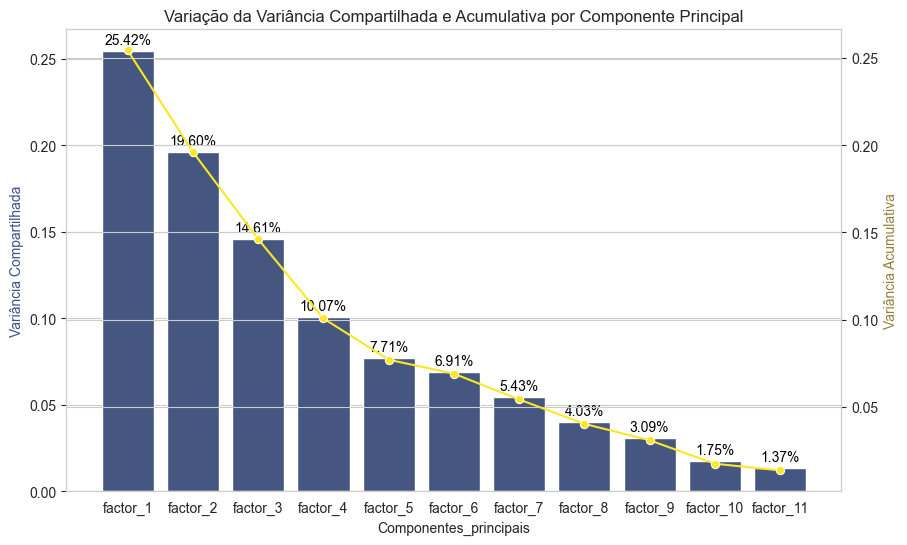

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráfico com Seaborn
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras (variância compartilhada)
sns.barplot(x="Componentes_principais", y="Var_compartilhada", data=data_autovalores, color='#3b528b', ax=ax1)
ax1.set_ylabel('Variância Compartilhada', color='#3b528b')
    
# Criar segundo eixo y para a linha (variância acumulativa)
ax2 = ax1.twinx()
sns.lineplot(x="Componentes_principais", y="Var_compartilhada", data=data_autovalores, marker='o', color='#fde725', ax=ax2)
ax2.set_ylabel('Variância Acumulativa', color='#9B7F40')


# Adicionar anotações aos valores de var_compartilhada
for i, v in enumerate(data_autovalores["Var_compartilhada"]):
    ax1.annotate(f'{v*100:.2f}%', (i, v), xytext=(0, 5), textcoords='offset points', ha='center', color='black')


# Definir título
plt.title('Variação da Variância Compartilhada e Acumulativa por Componente Principal')

# Exibir o gráfico
plt.show()


In [138]:
n_factors=4

In [139]:
fa = Fa(n_factors=n_factors, rotation=None)
fa.fit(df_wine_sc)
factor_analyzer_result=pd.DataFrame(fa.loadings_)
factor_analyzer_result.style.background_gradient(cmap='magma_r')

,0,1,2,3
0,0.858151,-0.063034,-0.035322,-0.061158
1,-0.359511,0.282531,-0.487074,-0.075984
2,0.637799,-0.150642,0.370470,0.041209
3,0.246301,0.183337,-0.024213,0.218253
4,0.199248,0.273832,-0.214297,0.014001
5,-0.149546,0.687021,0.414907,0.003268
6,-0.039900,0.927881,0.358686,-0.100654
7,0.731200,0.385541,-0.419066,0.386984
8,-0.696615,0.034755,-0.035596,0.559385
9,0.247923,-0.103521,0.351676,0.286289


In [141]:
fa_columns_list=[f"factor_{i+1}" for i in range(n_factors)]
fa_columns_list

['factor_1', 'factor_2', 'factor_3', 'factor_4']

In [144]:
factor_analyzer_result.columns=fa_columns_list
fact_check=factor_analyzer_result
fact_check.style

,factor_1,factor_2,factor_3,factor_4
0,0.858151,-0.063034,-0.035322,-0.061158
1,-0.359511,0.282531,-0.487074,-0.075984
2,0.637799,-0.150642,0.370470,0.041209
3,0.246301,0.183337,-0.024213,0.218253
4,0.199248,0.273832,-0.214297,0.014001
5,-0.149546,0.687021,0.414907,0.003268
6,-0.039900,0.927881,0.358686,-0.100654
7,0.731200,0.385541,-0.419066,0.386984
8,-0.696615,0.034755,-0.035596,0.559385
9,0.247923,-0.103521,0.351676,0.286289


In [145]:
fc_list=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
          "total sulfur dioxide","density","pH","sulphates","alcohol"]
fact_check.index=fc_list
fact_check

,factor_1,factor_2,factor_3,factor_4
fixed acidity,0.858151,-0.063034,-0.035322,-0.061158
volatile acidity,-0.359511,0.282531,-0.487074,-0.075984
citric acid,0.637799,-0.150642,0.370470,0.041209
residual sugar,0.246301,0.183337,-0.024213,0.218253
chlorides,0.199248,0.273832,-0.214297,0.014001
free sulfur dioxide,-0.149546,0.687021,0.414907,0.003268
total sulfur dioxide,-0.039900,0.927881,0.358686,-0.100654
density,0.731200,0.385541,-0.419066,0.386984
pH,-0.696615,0.034755,-0.035596,0.559385
sulphates,0.247923,-0.103521,0.351676,0.286289


In [146]:
fact_check_ = fact_check.style.background_gradient(cmap='magma_r')
fact_check_

,factor_1,factor_2,factor_3,factor_4
fixed acidity,0.858151,-0.063034,-0.035322,-0.061158
volatile acidity,-0.359511,0.282531,-0.487074,-0.075984
citric acid,0.637799,-0.150642,0.370470,0.041209
residual sugar,0.246301,0.183337,-0.024213,0.218253
chlorides,0.199248,0.273832,-0.214297,0.014001
free sulfur dioxide,-0.149546,0.687021,0.414907,0.003268
total sulfur dioxide,-0.039900,0.927881,0.358686,-0.100654
density,0.731200,0.385541,-0.419066,0.386984
pH,-0.696615,0.034755,-0.035596,0.559385
sulphates,0.247923,-0.103521,0.351676,0.286289


* **Fator 1:**
  * Variáveis relacionadas a acidez
    * Fixed acidity +
    * citric acid + 
    * densidade + 
    * pH - 
  
  

* **Fator 2:**

  * Teor de sulfatos
    * total sulfur dioxide
    * free sulfur dioxide

* **Fator 3:**

  * Teor de sulfatos
    * total sulfur dioxide
    * free sulfur dioxide

* **Fator 4:**

  * Teor alcoolico
    * total sulfur dioxide
    * free sulfur dioxide

#### Aplicando o metodo de PCA

* PCA
* Com rotação de componentes 

In [147]:
n_factors=len(list(df_wine_sc.columns))

In [148]:
fa= Fa(n_factors=n_factors, rotation='varimax')
fa.fit(df_wine_sc)

FactorAnalyzer(n_factors=11, rotation='varimax', rotation_kwargs={})

In [149]:
fa_columns_list=[f"factor_{i+1}" for i in range(n_factors)]

In [150]:
# Extrair os autovalores (valores próprios) e variâncias
eigenvalues, variance_shared = fa.get_eigenvalues()

print(f'Autovalores: \n{eigenvalues}\n')
print(f'Variância compartilhada: \n{(eigenvalues / sum(eigenvalues))}\n')
print(f'Variância acumulada: \n{((eigenvalues / sum(eigenvalues)).cumsum())}\n')

Autovalores: 
[2.79643352 2.15627801 1.60745555 1.10790468 0.84796961 0.75967029
 0.59748653 0.44367916 0.34041485 0.19250458 0.15020324]

Variância compartilhada: 
[0.25422123 0.19602527 0.14613232 0.10071861 0.07708815 0.06906094
 0.05431696 0.04033447 0.0309468  0.01750042 0.01365484]

Variância acumulada: 
[0.25422123 0.4502465  0.59637883 0.69709743 0.77418558 0.84324651
 0.89756347 0.93789794 0.96884474 0.98634516 1.        ]



In [151]:
# Dados
data_autovalores = {
    "Componentes_principais": fa_columns_list,
    "Autovalor": eigenvalues,
    "Var_compartilhada": (eigenvalues / sum(eigenvalues)),
    "Var_acumulativa":  ((eigenvalues / sum(eigenvalues)).cumsum())
}

data_autovalores = pd.DataFrame(data_autovalores)
data_autovalores

,Componentes_principais,Autovalor,Var_compartilhada,Var_acumulativa
0,factor_1,2.796434,0.254221,0.254221
1,factor_2,2.156278,0.196025,0.450247
2,factor_3,1.607456,0.146132,0.596379
3,factor_4,1.107905,0.100719,0.697097
4,factor_5,0.847970,0.077088,0.774186
5,factor_6,0.759670,0.069061,0.843247
6,factor_7,0.597487,0.054317,0.897563
7,factor_8,0.443679,0.040334,0.937898
8,factor_9,0.340415,0.030947,0.968845
9,factor_10,0.192505,0.017500,0.986345


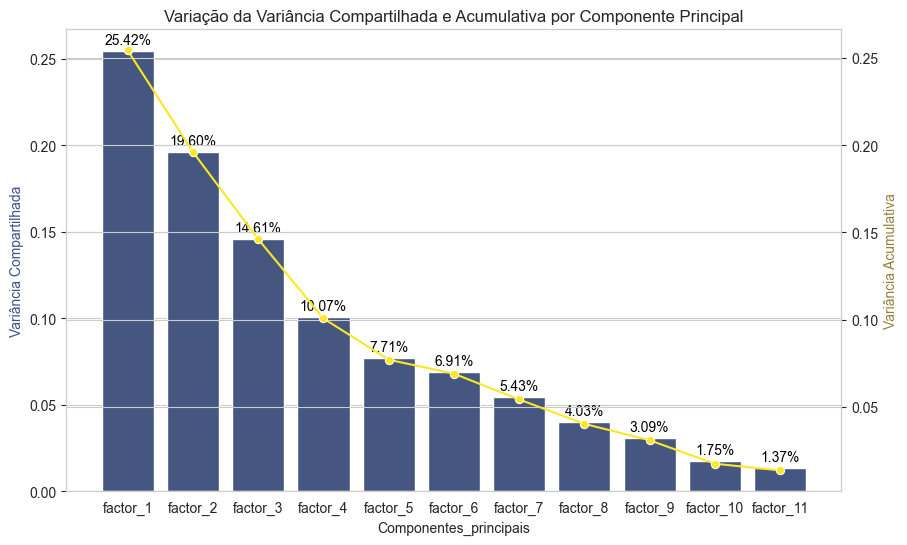

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráfico com Seaborn
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras (variância compartilhada)
sns.barplot(x="Componentes_principais", y="Var_compartilhada", data=data_autovalores, color='#3b528b', ax=ax1)
ax1.set_ylabel('Variância Compartilhada', color='#3b528b')
    
# Criar segundo eixo y para a linha (variância acumulativa)
ax2 = ax1.twinx()
sns.lineplot(x="Componentes_principais", y="Var_compartilhada", data=data_autovalores, marker='o', color='#fde725', ax=ax2)
ax2.set_ylabel('Variância Acumulativa', color='#9B7F40')


# Adicionar anotações aos valores de var_compartilhada
for i, v in enumerate(data_autovalores["Var_compartilhada"]):
    ax1.annotate(f'{v*100:.2f}%', (i, v), xytext=(0, 5), textcoords='offset points', ha='center', color='black')


# Definir título
plt.title('Variação da Variância Compartilhada e Acumulativa por Componente Principal')

# Exibir o gráfico
plt.show()


In [153]:
n_factors=7

In [154]:
fa = Fa(n_factors=n_factors, rotation='varimax')
fa.fit(df_wine_sc)
factor_analyzer_result=pd.DataFrame(fa.loadings_)
factor_analyzer_result.style.background_gradient(cmap='magma_r')

,0,1,2,3,4,5,6
0,-0.125305,0.817610,0.376644,0.148958,0.125681,0.145085,-0.135239
1,0.046599,-0.188946,0.109230,-0.872081,0.023184,-0.097661,0.063842
2,-0.015083,0.485894,0.115137,0.464557,0.048112,0.242161,0.108874
3,0.075135,0.069270,0.167939,-0.005248,0.974336,0.075259,0.036544
4,0.093639,0.112929,0.288110,-0.122280,0.134115,-0.093372,0.211023
5,0.935501,-0.097856,-0.017506,0.009008,0.028840,0.031566,-0.130163
6,0.877720,-0.007152,0.119464,-0.043757,0.060828,-0.087842,0.188333
7,0.016515,0.240257,0.948403,0.077333,0.177213,0.003840,-0.016222
8,0.019889,-0.788209,-0.059956,-0.117544,0.001314,0.136036,-0.097415
9,0.039853,0.060270,0.096311,0.338197,-0.001905,0.377376,-0.039546


In [155]:
fa_columns_list=[f"factor_{i+1}" for i in range(n_factors)]
fa_columns_list

['factor_1',
 'factor_2',
 'factor_3',
 'factor_4',
 'factor_5',
 'factor_6',
 'factor_7']

In [156]:
factor_analyzer_result.columns=fa_columns_list
fact_check=factor_analyzer_result
fact_check

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
0,-0.125305,0.817610,0.376644,0.148958,0.125681,0.145085,-0.135239
1,0.046599,-0.188946,0.109230,-0.872081,0.023184,-0.097661,0.063842
2,-0.015083,0.485894,0.115137,0.464557,0.048112,0.242161,0.108874
3,0.075135,0.069270,0.167939,-0.005248,0.974336,0.075259,0.036544
4,0.093639,0.112929,0.288110,-0.122280,0.134115,-0.093372,0.211023
5,0.935501,-0.097856,-0.017506,0.009008,0.028840,0.031566,-0.130163
6,0.877720,-0.007152,0.119464,-0.043757,0.060828,-0.087842,0.188333
7,0.016515,0.240257,0.948403,0.077333,0.177213,0.003840,-0.016222
8,0.019889,-0.788209,-0.059956,-0.117544,0.001314,0.136036,-0.097415
9,0.039853,0.060270,0.096311,0.338197,-0.001905,0.377376,-0.039546


In [157]:
fc_list=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
          "total sulfur dioxide","density","pH","sulphates","alcohol"]
fact_check.index=fc_list
fact_check

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
fixed acidity,-0.125305,0.817610,0.376644,0.148958,0.125681,0.145085,-0.135239
volatile acidity,0.046599,-0.188946,0.109230,-0.872081,0.023184,-0.097661,0.063842
citric acid,-0.015083,0.485894,0.115137,0.464557,0.048112,0.242161,0.108874
residual sugar,0.075135,0.069270,0.167939,-0.005248,0.974336,0.075259,0.036544
chlorides,0.093639,0.112929,0.288110,-0.122280,0.134115,-0.093372,0.211023
free sulfur dioxide,0.935501,-0.097856,-0.017506,0.009008,0.028840,0.031566,-0.130163
total sulfur dioxide,0.877720,-0.007152,0.119464,-0.043757,0.060828,-0.087842,0.188333
density,0.016515,0.240257,0.948403,0.077333,0.177213,0.003840,-0.016222
pH,0.019889,-0.788209,-0.059956,-0.117544,0.001314,0.136036,-0.097415
sulphates,0.039853,0.060270,0.096311,0.338197,-0.001905,0.377376,-0.039546


In [158]:
fact_check_ = fact_check.style.background_gradient(cmap='magma_r')
fact_check_

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
fixed acidity,-0.125305,0.817610,0.376644,0.148958,0.125681,0.145085,-0.135239
volatile acidity,0.046599,-0.188946,0.109230,-0.872081,0.023184,-0.097661,0.063842
citric acid,-0.015083,0.485894,0.115137,0.464557,0.048112,0.242161,0.108874
residual sugar,0.075135,0.069270,0.167939,-0.005248,0.974336,0.075259,0.036544
chlorides,0.093639,0.112929,0.288110,-0.122280,0.134115,-0.093372,0.211023
free sulfur dioxide,0.935501,-0.097856,-0.017506,0.009008,0.028840,0.031566,-0.130163
total sulfur dioxide,0.877720,-0.007152,0.119464,-0.043757,0.060828,-0.087842,0.188333
density,0.016515,0.240257,0.948403,0.077333,0.177213,0.003840,-0.016222
pH,0.019889,-0.788209,-0.059956,-0.117544,0.001314,0.136036,-0.097415
sulphates,0.039853,0.060270,0.096311,0.338197,-0.001905,0.377376,-0.039546


* **Fator 1:**
  * Variáveis relacionadas a acidez
    * Fixed acidity +
    * citric acid + 
    * pH - 
  
  

* **Fator 2:**

  * Teor de sulfatos
    * total sulfur dioxide
    * free sulfur dioxide

* **Fator 3:**

  * Teor Alcoolico
    * total sulfur dioxide
    * free sulfur dioxide

* **Fator 4:**

  * volatilidade
    * total sulfur dioxide
    * free sulfur dioxide

* **Fator 5:**

  * Densidade e Açúcares residuais
    * residual sugar
    * density

* **Fator 6:**

  * sulfatos
    * sulphates

#### Aplicando o Método de Máxima Verossímilhança 

In [159]:
n_factors=len(list(df_wine_sc.columns))

In [160]:
fa = Fa(n_factors=n_factors,method='ml', rotation='varimax')
fa.fit(df_wine_sc)

FactorAnalyzer(method='ml', n_factors=11, rotation='varimax',
               rotation_kwargs={})

In [161]:
fa_columns_list=[f"factor_{i+1}" for i in range(n_factors)]

In [162]:
# Extrair os autovalores (valores próprios) e variâncias
eigenvalues, variance_shared = fa.get_eigenvalues()

print(f'Autovalores: \n{eigenvalues}\n')
print(f'Variância compartilhada: \n{(eigenvalues / sum(eigenvalues))}\n')
print(f'Variância acumulada: \n{((eigenvalues / sum(eigenvalues)).cumsum())}\n')

Autovalores: 
[2.79643352 2.15627801 1.60745555 1.10790468 0.84796961 0.75967029
 0.59748653 0.44367916 0.34041485 0.19250458 0.15020324]

Variância compartilhada: 
[0.25422123 0.19602527 0.14613232 0.10071861 0.07708815 0.06906094
 0.05431696 0.04033447 0.0309468  0.01750042 0.01365484]

Variância acumulada: 
[0.25422123 0.4502465  0.59637883 0.69709743 0.77418558 0.84324651
 0.89756347 0.93789794 0.96884474 0.98634516 1.        ]



In [163]:
# Dados
data_autovalores = {
    "Componentes_principais": fa_columns_list,
    "Autovalor": eigenvalues,
    "Var_compartilhada": (eigenvalues / sum(eigenvalues)),
    "Var_acumulativa":  ((eigenvalues / sum(eigenvalues)).cumsum())
}

data_autovalores = pd.DataFrame(data_autovalores)
data_autovalores

,Componentes_principais,Autovalor,Var_compartilhada,Var_acumulativa
0,factor_1,2.796434,0.254221,0.254221
1,factor_2,2.156278,0.196025,0.450247
2,factor_3,1.607456,0.146132,0.596379
3,factor_4,1.107905,0.100719,0.697097
4,factor_5,0.847970,0.077088,0.774186
5,factor_6,0.759670,0.069061,0.843247
6,factor_7,0.597487,0.054317,0.897563
7,factor_8,0.443679,0.040334,0.937898
8,factor_9,0.340415,0.030947,0.968845
9,factor_10,0.192505,0.017500,0.986345


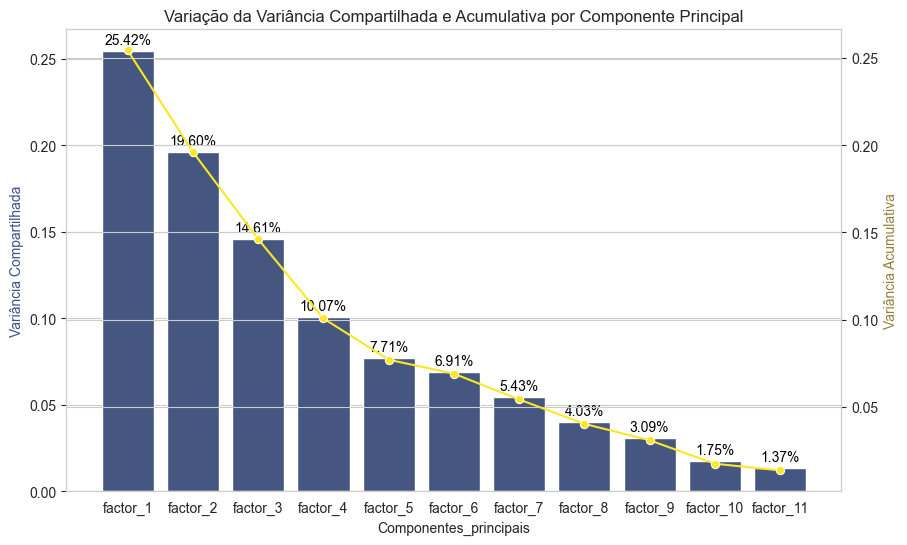

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráfico com Seaborn
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras (variância compartilhada)
sns.barplot(x="Componentes_principais", y="Var_compartilhada", data=data_autovalores, color='#3b528b', ax=ax1)
ax1.set_ylabel('Variância Compartilhada', color='#3b528b')
    
# Criar segundo eixo y para a linha (variância acumulativa)
ax2 = ax1.twinx()
sns.lineplot(x="Componentes_principais", y="Var_compartilhada", data=data_autovalores, marker='o', color='#fde725', ax=ax2)
ax2.set_ylabel('Variância Acumulativa', color='#9B7F40')


# Adicionar anotações aos valores de var_compartilhada
for i, v in enumerate(data_autovalores["Var_compartilhada"]):
    ax1.annotate(f'{v*100:.2f}%', (i, v), xytext=(0, 5), textcoords='offset points', ha='center', color='black')


# Definir título
plt.title('Variação da Variância Compartilhada e Acumulativa por Componente Principal')

# Exibir o gráfico
plt.show()


In [165]:
n_factors=7

In [166]:
fa = Fa(n_factors=n_factors,method='ml', rotation='varimax')
fa.fit(df_wine_sc)
factor_analyzer_result=pd.DataFrame(fa.loadings_)
factor_analyzer_result.style.background_gradient(cmap='magma_r')

,0,1,2,3,4,5,6
0,-0.126104,0.820706,0.370603,-0.140584,0.127879,0.156828,-0.133164
1,0.045611,-0.191777,0.106883,0.865769,0.024876,-0.116226,0.064009
2,-0.015571,0.487839,0.110388,-0.458907,0.049046,0.253996,0.117156
3,0.075043,0.069709,0.164124,0.006145,0.969426,0.073075,0.036957
4,0.093146,0.112044,0.290466,0.121744,0.134907,-0.090970,0.213371
5,0.926824,-0.098524,-0.016382,-0.007820,0.029248,0.034310,-0.124464
6,0.884077,-0.006442,0.122059,0.044011,0.060361,-0.084053,0.182918
7,0.015282,0.242507,0.947313,-0.070576,0.179901,0.030222,-0.017226
8,0.019587,-0.786249,-0.063162,0.119139,0.002286,0.133981,-0.094989
9,0.039294,0.061973,0.087550,-0.329210,0.000192,0.387554,-0.041193


In [167]:
fa_columns_list=[f"factor_{i+1}" for i in range(n_factors)]
fa_columns_list

['factor_1',
 'factor_2',
 'factor_3',
 'factor_4',
 'factor_5',
 'factor_6',
 'factor_7']

In [168]:
factor_analyzer_result.columns=fa_columns_list
fact_check=factor_analyzer_result
fact_check

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
0,-0.126104,0.820706,0.370603,-0.140584,0.127879,0.156828,-0.133164
1,0.045611,-0.191777,0.106883,0.865769,0.024876,-0.116226,0.064009
2,-0.015571,0.487839,0.110388,-0.458907,0.049046,0.253996,0.117156
3,0.075043,0.069709,0.164124,0.006145,0.969426,0.073075,0.036957
4,0.093146,0.112044,0.290466,0.121744,0.134907,-0.090970,0.213371
5,0.926824,-0.098524,-0.016382,-0.007820,0.029248,0.034310,-0.124464
6,0.884077,-0.006442,0.122059,0.044011,0.060361,-0.084053,0.182918
7,0.015282,0.242507,0.947313,-0.070576,0.179901,0.030222,-0.017226
8,0.019587,-0.786249,-0.063162,0.119139,0.002286,0.133981,-0.094989
9,0.039294,0.061973,0.087550,-0.329210,0.000192,0.387554,-0.041193


In [169]:
fc_list=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
          "total sulfur dioxide","density","pH","sulphates","alcohol"]
fact_check.index=fc_list
fact_check

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
fixed acidity,-0.126104,0.820706,0.370603,-0.140584,0.127879,0.156828,-0.133164
volatile acidity,0.045611,-0.191777,0.106883,0.865769,0.024876,-0.116226,0.064009
citric acid,-0.015571,0.487839,0.110388,-0.458907,0.049046,0.253996,0.117156
residual sugar,0.075043,0.069709,0.164124,0.006145,0.969426,0.073075,0.036957
chlorides,0.093146,0.112044,0.290466,0.121744,0.134907,-0.090970,0.213371
free sulfur dioxide,0.926824,-0.098524,-0.016382,-0.007820,0.029248,0.034310,-0.124464
total sulfur dioxide,0.884077,-0.006442,0.122059,0.044011,0.060361,-0.084053,0.182918
density,0.015282,0.242507,0.947313,-0.070576,0.179901,0.030222,-0.017226
pH,0.019587,-0.786249,-0.063162,0.119139,0.002286,0.133981,-0.094989
sulphates,0.039294,0.061973,0.087550,-0.329210,0.000192,0.387554,-0.041193


In [170]:
fact_check_ = fact_check.style.background_gradient(cmap='magma_r')
fact_check_

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
fixed acidity,-0.126104,0.820706,0.370603,-0.140584,0.127879,0.156828,-0.133164
volatile acidity,0.045611,-0.191777,0.106883,0.865769,0.024876,-0.116226,0.064009
citric acid,-0.015571,0.487839,0.110388,-0.458907,0.049046,0.253996,0.117156
residual sugar,0.075043,0.069709,0.164124,0.006145,0.969426,0.073075,0.036957
chlorides,0.093146,0.112044,0.290466,0.121744,0.134907,-0.090970,0.213371
free sulfur dioxide,0.926824,-0.098524,-0.016382,-0.007820,0.029248,0.034310,-0.124464
total sulfur dioxide,0.884077,-0.006442,0.122059,0.044011,0.060361,-0.084053,0.182918
density,0.015282,0.242507,0.947313,-0.070576,0.179901,0.030222,-0.017226
pH,0.019587,-0.786249,-0.063162,0.119139,0.002286,0.133981,-0.094989
sulphates,0.039294,0.061973,0.087550,-0.329210,0.000192,0.387554,-0.041193


* **Fator 1:**

  * Teor de sulfatos
    * total sulfur dioxide
    * free sulfur dioxide

* **Fator 2:**
  * Teor de ácido Cítrico
    * citric acid + 

  
  

* **Fator 3:**

  * Teor Alcoolico + Densidade
    * alchool
    * density

* **Fator 4:**

  * Acidez
    * fixed acidity	
    * pH

* **Fator 5:**

  * Densidade e Açúcares residuais
    * residual sugar
    * density

* **Fator 6:**

  * sulfatos
    * sulphates

* Fator 7
  
  * Acidez + densidade 
  
    * density
    *  fixed acidity	



df_wine_sc_= df_wine_sc.drop(axis=1)

In [171]:
df_wine_sc_ = df_wine_sc.drop(['volatile acidity', 'chlorides'], axis=1)
df_wine_sc_

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
No.,,,,,,,,,
1,-0.484269,-0.183984,-0.644230,-0.226691,-0.105565,0.666011,1.414316,-0.614559,-0.996253
2,-0.208118,-0.183984,1.063619,0.987988,0.856494,0.039778,-0.800453,0.406057,-0.573018
3,-0.208118,-2.491518,0.395773,0.232123,0.550547,0.165074,-0.355552,0.168596,-0.573018
4,1.690162,1.188324,-0.644230,0.417307,0.699982,0.791183,-1.101698,-0.430334,-0.573018
5,-0.484269,-0.183984,-0.644230,-0.226691,-0.105565,0.666011,1.414316,-0.614559,-0.996253
...,...,...,...,...,...,...,...,...,...
1595,-1.412236,-1.602732,-0.365111,1.353325,0.260090,-1.151782,1.001287,-0.430334,0.127724
1596,-1.672316,-1.299300,0.153718,1.646116,0.469479,-1.013696,1.482470,0.992068,0.783266
1597,-1.328327,-0.934641,0.395773,1.207636,0.124918,-0.624709,0.792079,0.922237,0.600241


In [172]:
n_factors=len(list(df_wine_sc_.columns))

In [173]:
fa = Fa(n_factors=n_factors,method='ml', rotation='varimax')
fa.fit(df_wine_sc_)

FactorAnalyzer(method='ml', n_factors=9, rotation='varimax', rotation_kwargs={})

In [174]:
fa_columns_list=[f"factor_{i+1}" for i in range(n_factors)]

In [175]:
# Extrair os autovalores (valores próprios) e variâncias
eigenvalues, variance_shared = fa.get_eigenvalues()

print(f'Autovalores: \n{eigenvalues}\n')
print(f'Variância compartilhada: \n{(eigenvalues / sum(eigenvalues))}\n')
print(f'Variância acumulada: \n{((eigenvalues / sum(eigenvalues)).cumsum())}\n')

Autovalores: 
[2.59898948 1.94898208 1.37547685 1.02286793 0.84649773 0.50698537
 0.34924044 0.20011762 0.15084249]

Variância compartilhada: 
[0.28877661 0.21655356 0.15283076 0.11365199 0.0940553  0.05633171
 0.03880449 0.02223529 0.01676028]

Variância acumulada: 
[0.28877661 0.50533017 0.65816093 0.77181293 0.86586823 0.92219994
 0.96100443 0.98323972 1.        ]



In [176]:
# Dados
data_autovalores = {
    "Componentes_principais": fa_columns_list,
    "Autovalor": eigenvalues,
    "Var_compartilhada": (eigenvalues / sum(eigenvalues)),
    "Var_acumulativa":  ((eigenvalues / sum(eigenvalues)).cumsum())
}

data_autovalores = pd.DataFrame(data_autovalores)
data_autovalores

,Componentes_principais,Autovalor,Var_compartilhada,Var_acumulativa
0,factor_1,2.598989,0.288777,0.288777
1,factor_2,1.948982,0.216554,0.505330
2,factor_3,1.375477,0.152831,0.658161
3,factor_4,1.022868,0.113652,0.771813
4,factor_5,0.846498,0.094055,0.865868
5,factor_6,0.506985,0.056332,0.922200
6,factor_7,0.349240,0.038804,0.961004
7,factor_8,0.200118,0.022235,0.983240
8,factor_9,0.150842,0.016760,1.000000


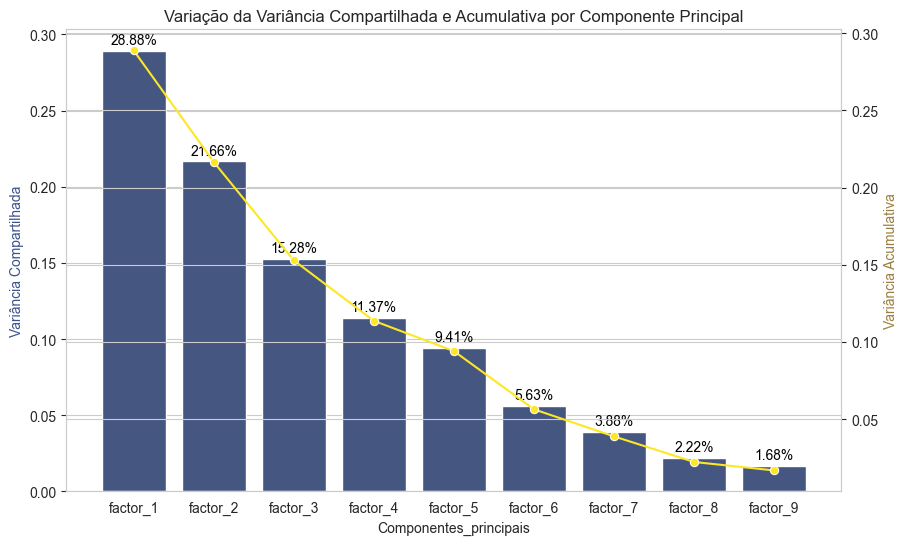

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráfico com Seaborn
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras (variância compartilhada)
sns.barplot(x="Componentes_principais", y="Var_compartilhada", data=data_autovalores, color='#3b528b', ax=ax1)
ax1.set_ylabel('Variância Compartilhada', color='#3b528b')
    
# Criar segundo eixo y para a linha (variância acumulativa)
ax2 = ax1.twinx()
sns.lineplot(x="Componentes_principais", y="Var_compartilhada", data=data_autovalores, marker='o', color='#fde725', ax=ax2)
ax2.set_ylabel('Variância Acumulativa', color='#9B7F40')


# Adicionar anotações aos valores de var_compartilhada
for i, v in enumerate(data_autovalores["Var_compartilhada"]):
    ax1.annotate(f'{v*100:.2f}%', (i, v), xytext=(0, 5), textcoords='offset points', ha='center', color='black')


# Definir título
plt.title('Variação da Variância Compartilhada e Acumulativa por Componente Principal')

# Exibir o gráfico
plt.show()


In [178]:
n_factors=7

In [180]:
fa = Fa(n_factors=n_factors,method='ml', rotation='varimax')
fa.fit(df_wine_sc_)
factor_analyzer_result=pd.DataFrame(fa.loadings_)
factor_analyzer_result.style.background_gradient(cmap='magma_r')

,0,1,2,3,4,5,6
0,-0.142467,0.778713,0.200703,0.314936,0.238716,0.407722,-0.036511
1,-0.029369,0.504454,-0.031527,0.120503,0.420528,0.026344,0.038864
2,0.080869,0.070042,-0.023919,0.593512,0.030034,0.015210,0.008027
3,0.954048,-0.105829,-0.004106,0.027784,0.052343,0.027613,-0.263252
4,0.920480,-0.000476,0.146670,0.124362,-0.033242,-0.061389,0.318562
5,-0.029885,0.216041,0.717361,0.580983,0.265420,0.059975,-0.024223
6,0.016006,-0.864437,-0.106769,0.000407,0.020361,0.092653,-0.004548
7,0.023097,0.068188,-0.076483,0.034665,0.578835,0.016956,-0.012034
8,-0.131690,-0.079045,-0.815843,0.128114,0.276336,-0.002187,-0.022842


In [181]:
fa_columns_list=[f"factor_{i+1}" for i in range(n_factors)]
fa_columns_list

['factor_1',
 'factor_2',
 'factor_3',
 'factor_4',
 'factor_5',
 'factor_6',
 'factor_7']

In [183]:
factor_analyzer_result.columns=fa_columns_list
fact_check=factor_analyzer_result
fact_check.style.background_gradient(cmap='magma_r')

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
0,-0.142467,0.778713,0.200703,0.314936,0.238716,0.407722,-0.036511
1,-0.029369,0.504454,-0.031527,0.120503,0.420528,0.026344,0.038864
2,0.080869,0.070042,-0.023919,0.593512,0.030034,0.015210,0.008027
3,0.954048,-0.105829,-0.004106,0.027784,0.052343,0.027613,-0.263252
4,0.920480,-0.000476,0.146670,0.124362,-0.033242,-0.061389,0.318562
5,-0.029885,0.216041,0.717361,0.580983,0.265420,0.059975,-0.024223
6,0.016006,-0.864437,-0.106769,0.000407,0.020361,0.092653,-0.004548
7,0.023097,0.068188,-0.076483,0.034665,0.578835,0.016956,-0.012034
8,-0.131690,-0.079045,-0.815843,0.128114,0.276336,-0.002187,-0.022842


In [184]:
fc_list=["fixed acidity","citric acid","residual sugar","free sulfur dioxide",
          "total sulfur dioxide","density","pH","sulphates","alcohol"]
fact_check.index=fc_list
fact_check

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
fixed acidity,-0.142467,0.778713,0.200703,0.314936,0.238716,0.407722,-0.036511
citric acid,-0.029369,0.504454,-0.031527,0.120503,0.420528,0.026344,0.038864
residual sugar,0.080869,0.070042,-0.023919,0.593512,0.030034,0.015210,0.008027
free sulfur dioxide,0.954048,-0.105829,-0.004106,0.027784,0.052343,0.027613,-0.263252
total sulfur dioxide,0.920480,-0.000476,0.146670,0.124362,-0.033242,-0.061389,0.318562
density,-0.029885,0.216041,0.717361,0.580983,0.265420,0.059975,-0.024223
pH,0.016006,-0.864437,-0.106769,0.000407,0.020361,0.092653,-0.004548
sulphates,0.023097,0.068188,-0.076483,0.034665,0.578835,0.016956,-0.012034
alcohol,-0.131690,-0.079045,-0.815843,0.128114,0.276336,-0.002187,-0.022842


In [185]:
fact_check_ = fact_check.style.background_gradient(cmap='magma_r')
fact_check_

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
fixed acidity,-0.142467,0.778713,0.200703,0.314936,0.238716,0.407722,-0.036511
citric acid,-0.029369,0.504454,-0.031527,0.120503,0.420528,0.026344,0.038864
residual sugar,0.080869,0.070042,-0.023919,0.593512,0.030034,0.015210,0.008027
free sulfur dioxide,0.954048,-0.105829,-0.004106,0.027784,0.052343,0.027613,-0.263252
total sulfur dioxide,0.920480,-0.000476,0.146670,0.124362,-0.033242,-0.061389,0.318562
density,-0.029885,0.216041,0.717361,0.580983,0.265420,0.059975,-0.024223
pH,0.016006,-0.864437,-0.106769,0.000407,0.020361,0.092653,-0.004548
sulphates,0.023097,0.068188,-0.076483,0.034665,0.578835,0.016956,-0.012034
alcohol,-0.131690,-0.079045,-0.815843,0.128114,0.276336,-0.002187,-0.022842


**Cargas fatoriais**

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\4158778690.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(fator_1[i], fator_2[i], var, fontsize=12)


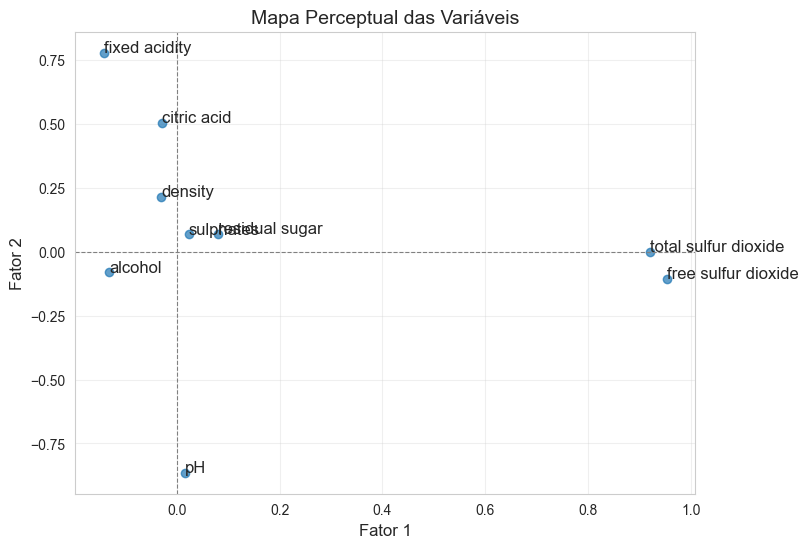

In [186]:
# Selecionar os dois primeiros fatores para o mapa perceptual
fator_1 = fact_check['factor_1']
fator_2 = fact_check['factor_2']

# Criar o mapa perceptual
plt.figure(figsize=(8, 6))
plt.scatter(fator_1, fator_2, alpha=0.7)

# Adicionar os rótulos das variáveis
for i, var in enumerate(fact_check.index):
    plt.text(fator_1[i], fator_2[i], var, fontsize=12)

# Configurações do gráfico
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')
plt.title("Mapa Perceptual das Variáveis", fontsize=14)
plt.xlabel("Fator 1", fontsize=12)
plt.ylabel("Fator 2", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [187]:
# Obter as pontuações fatoriais (factor scores)
fator_scores = fa.transform(df_wine_sc_)

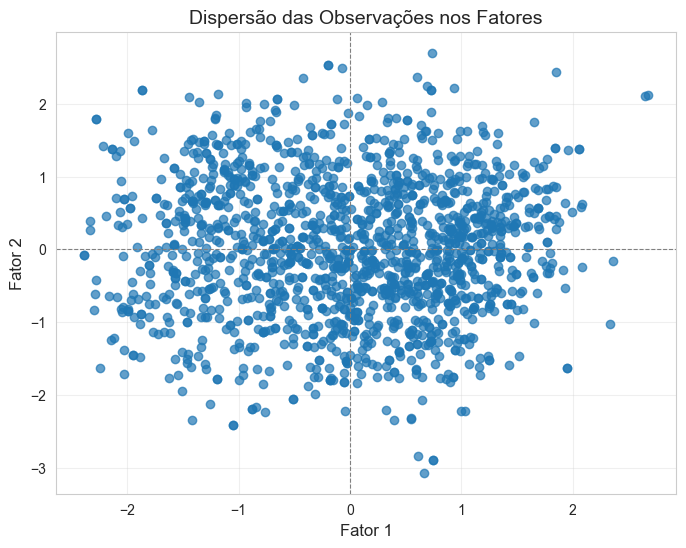

In [188]:
# Criar o gráfico de dispersão para os dois primeiros fatores
plt.figure(figsize=(8, 6))
plt.scatter(fator_scores[:, 0], fator_scores[:, 1], alpha=0.7)

# Configurações do gráfico
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')

# Configurações do gráfico
plt.title("Dispersão das Observações nos Fatores", fontsize=14)
plt.xlabel("Fator 1", fontsize=12)
plt.ylabel("Fator 2", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

In [189]:
F1 = fact_check['factor_1']
F2 = fact_check['factor_2']
var1=  data_autovalores['Var_compartilhada'].values[0]
var2=  data_autovalores['Var_compartilhada'].values[1]

In [190]:
# Transformar em DataFrame e adicionar nomes para as colunas
fator_scores_df = pd.DataFrame(fator_scores, columns=[f'Fator_{i+1}' for i in range(fator_scores.shape[1])])
fator_scores_df

,Fator_1,Fator_2,Fator_3,Fator_4,Fator_5,Fator_6,Fator_7
0,-0.333924,-1.166032,1.174508,0.048222,-0.007773,0.319094,0.131048
1,0.992312,0.335051,0.166089,0.002198,-0.295223,-0.716256,-0.406172
2,0.359632,-0.073823,0.426507,0.211579,-0.865147,-0.096274,0.273785
3,0.643425,1.525628,0.501897,0.044890,0.178685,1.034565,0.275972
4,-0.333924,-1.166032,1.174508,0.048222,-0.007773,0.319094,0.131048
...,...,...,...,...,...,...,...
1594,0.939484,-1.122401,-0.506245,-0.663032,-0.584643,-0.006601,-1.410131
1595,1.153316,-1.614215,-0.808352,-0.267385,0.336549,-0.301357,-1.351576
1596,0.725299,-1.171029,-0.536155,-0.102951,0.321336,-0.693745,-1.448031
1597,0.860004,-1.784976,-0.065984,-0.686776,0.165156,-0.024233,-1.298740


In [194]:
statistics= fa.sufficiency(df_wine_sc_.shape[0])
statistics

(7.905853749434755e-11, -6, nan)

In [195]:
fa.sufficiency(df_wine_sc_)

(      fixed acidity   citric acid  residual sugar  free sulfur dioxide  \
 No.                                                                      
 1     -4.965975e-13 -4.816619e-13   -5.045536e-13        -4.837861e-13   
 2     -4.828623e-13 -4.816619e-13   -4.196086e-13        -4.233704e-13   
 3     -4.828623e-13 -5.964340e-13   -4.528260e-13        -4.609656e-13   
 4     -3.884456e-13 -4.134061e-13   -5.045536e-13        -4.517549e-13   
 5     -4.965975e-13 -4.816619e-13   -5.045536e-13        -4.837861e-13   
 ...             ...           ...             ...                  ...   
 1595  -5.427527e-13 -5.522276e-13   -4.906708e-13        -4.051992e-13   
 1596  -5.556886e-13 -5.371355e-13   -4.648653e-13        -3.906364e-13   
 1597  -5.385793e-13 -5.189981e-13   -4.528260e-13        -4.124455e-13   
 1598  -5.556886e-13 -5.245716e-13   -4.906708e-13        -4.051992e-13   
 1599  -5.513051e-13 -4.263306e-13   -4.710908e-13        -4.475485e-13   
 
       total sulfur dio

In [196]:
factor_analyzer_result.columns=fa_columns_list
fact_check=factor_analyzer_result
fact_check.style.background_gradient(cmap='magma_r')

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7
fixed acidity,-0.142467,0.778713,0.200703,0.314936,0.238716,0.407722,-0.036511
citric acid,-0.029369,0.504454,-0.031527,0.120503,0.420528,0.026344,0.038864
residual sugar,0.080869,0.070042,-0.023919,0.593512,0.030034,0.015210,0.008027
free sulfur dioxide,0.954048,-0.105829,-0.004106,0.027784,0.052343,0.027613,-0.263252
total sulfur dioxide,0.920480,-0.000476,0.146670,0.124362,-0.033242,-0.061389,0.318562
density,-0.029885,0.216041,0.717361,0.580983,0.265420,0.059975,-0.024223
pH,0.016006,-0.864437,-0.106769,0.000407,0.020361,0.092653,-0.004548
sulphates,0.023097,0.068188,-0.076483,0.034665,0.578835,0.016956,-0.012034
alcohol,-0.131690,-0.079045,-0.815843,0.128114,0.276336,-0.002187,-0.022842


In [ ]:
import numpy as np

def variable_select(df_factors):
    """
    Seleciona os fatores mais importantes com valor > 0.6 para cada coluna de um DataFrame,
    baseado nos valores absolutos.

    Parâmetros:
        df_factors (pd.DataFrame): DataFrame contendo os fatores, onde o índice
                                   representa as variáveis.

    Retorna:
        dict: Um dicionário onde as chaves são os nomes das colunas e os valores
              são listas de tuplas no formato (variável, valor), contendo as
              variáveis e seus fatores ordenados de forma decrescente.
    """
    vars = {}
    df_factors = np.abs(df_factors)  # Trabalhar com valores absolutos

    for coluna in df_factors.columns:
        # Filtrar valores > 0.6
        filtered_factors = df_factors[coluna][df_factors[coluna] > 0.5]
        # Seleciona os fatores mais importantes, ordenados de forma decrescente
        top_factors = filtered_factors.sort_values(ascending=False)
        # Adicionar ao dicionário o nome das variáveis e os valores
        vars[coluna] = top_factors.index

    return vars


In [201]:
vars_selected= variable_select(fact_check)
vars_selected

{'factor_1': Index(['free sulfur dioxide', 'total sulfur dioxide'], dtype='object'),
 'factor_2': Index(['pH', 'fixed acidity', 'citric acid'], dtype='object'),
 'factor_3': Index(['alcohol', 'density'], dtype='object'),
 'factor_4': Index(['residual sugar', 'density'], dtype='object'),
 'factor_5': Index(['sulphates'], dtype='object'),
 'factor_6': Index([], dtype='object'),
 'factor_7': Index([], dtype='object')}

In [449]:
positive_cols = ['alcohol'] # Quanto maior melhor 
negative_cols = ['density', 'pH', 'fixed acidity', 'residual sugar', 'citric acid', 'total sulfur dioxide']# Quanto menor melhor

In [445]:
df_wine_sc_.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [450]:
df_wine_sc_[negative_cols]= df_wine_sc_[negative_cols]*-1

In [451]:
df_f1 = df_wine_sc_[vars_selected['factor_1']]
df_f2 = df_wine_sc_[vars_selected['factor_2']]
df_f3 = df_wine_sc_[vars_selected['factor_3']]
df_f4 = df_wine_sc_[vars_selected['factor_4']]

In [452]:
df_f1

,free sulfur dioxide,total sulfur dioxide
No.,,
1,0.226691,-0.105565
2,-0.987988,0.856494
3,-0.232123,0.550547
4,-0.417307,0.699982
5,0.226691,-0.105565
...,...,...
1595,-1.353325,0.260090
1596,-1.646116,0.469479
1597,-1.207636,0.124918


In [453]:
# Obter as pontuações fatoriais (factor scores)
fator_scores = fa.transform(df_wine_sc_)
# Transformar em DataFrame e adicionar nomes para as colunas
fator_scores_df = pd.DataFrame(fator_scores, columns=[f'Fator_{i+1}' for i in range(fator_scores.shape[1])])
fator_scores_df

,Fator_1,Fator_2,Fator_3,Fator_4,Fator_5,Fator_6,Fator_7
0,0.270068,1.295207,0.090665,-1.283489,-0.869999,0.187316,-0.668194
1,-0.180421,-0.072267,0.073948,0.201865,-0.341079,0.803894,3.064050
2,0.172947,0.274567,0.031216,-0.428402,0.352995,0.267616,1.412068
3,0.046725,-1.248310,0.234420,-0.636787,-0.810362,-0.700605,1.889568
4,0.270068,1.295207,0.090665,-1.283489,-0.869999,0.187316,-0.668194
...,...,...,...,...,...,...,...
1594,-0.692268,1.198188,0.443755,0.798204,0.412670,0.041039,2.238732
1595,-0.725781,1.591011,-0.112327,1.005508,0.787386,-0.114625,3.128879
1596,-0.624811,1.082217,-0.226035,0.702854,0.615926,0.328964,2.050807
1597,-0.596788,1.844948,0.337257,0.196675,0.286073,0.056426,2.237448


In [454]:
y_f1= fator_scores_df['Fator_1']
y_f1.index = df_wine_sc_.index
y_f2= fator_scores_df['Fator_2']
y_f2.index = df_wine_sc_.index
y_f3= fator_scores_df['Fator_3']
y_f3.index = df_wine_sc_.index
y_f4= fator_scores_df['Fator_4']
y_f4.index = df_wine_sc_.index

In [455]:
y_f1

No.
1       0.270068
2      -0.180421
3       0.172947
4       0.046725
5       0.270068
          ...   
1595   -0.692268
1596   -0.725781
1597   -0.624811
1598   -0.596788
1599   -0.196919
Name: Fator_1, Length: 1599, dtype: float64

In [456]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

def regressao_linear_predict(df_f1, y_f1):
    """
    Realiza a regressão linear utilizando statsmodels e retorna as predições,
    além de calcular o erro MSE, o R² e retornar os coeficientes do modelo.

    Parâmetros:
        df_f1 (pd.DataFrame): DataFrame com as variáveis independentes.
        y_f1 (pd.Series ou pd.DataFrame): Variável dependente (target).
    
    Retorna:
        np.ndarray: Predições do modelo para os dados fornecidos.
        statsmodels.regression.linear_model.RegressionResultsWrapper: O modelo ajustado.
    """
    # # Alinhar os índices
    # df_f1, y_f1 = df_f1.align(y_f1, join="inner", axis=0)
    
    # Adicionar uma constante ao DataFrame (termo de interceptação)
    X = sm.add_constant(df_f1)
    
    # Ajustar o modelo de regressão linear
    model = sm.OLS(y_f1, X).fit()
    
    # Fazer predições
    predictions = model.predict(X)
    
    # Calcular o MSE (Erro Quadrático Médio)
    mse = mean_squared_error(y_f1, predictions)
    
    # Calcular o R² (Coeficiente de Determinação)
    r2 = r2_score(y_f1, predictions)
    
    # Exibir o resumo do modelo
    print(model.summary())
    
    # Exibir MSE e R²
    print(f"\nErro Quadrático Médio (MSE): {mse:.4f}")
    print(f"Coeficiente de Determinação (R²): {r2:.4f}")
    
    # # Exibir coeficientes do modelo
    # print("\nCoeficientes do modelo:")
    # print(model.params)
    coefs = model.params
    return predictions, coefs

In [457]:
y_f1_pred, coefs_f1 = regressao_linear_predict(df_f1, y_f1)

                            OLS Regression Results                            
Dep. Variable:                Fator_1   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     7689.
Date:                sáb, 07 dez 2024   Prob (F-statistic):               0.00
Time:                        14:18:29   Log-Likelihood:                 1123.9
No. Observations:                1599   AIC:                            -2242.
Df Residuals:                    1596   BIC:                            -2226.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 7.633e-17 

In [458]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dispercao(y_f1, y_f1_pred):
    """
    Plota um gráfico de dispersão de y_f1 (real) versus y_f1_pred (previsão),
    incluindo uma linha reta de y = x (reta ideal).

    Parâmetros:
        y_f1 (pd.Series ou np.ndarray): Valores reais da variável dependente.
        y_f1_pred (pd.Series ou np.ndarray): Previsões feitas pelo modelo.
    """
    plt.figure(figsize=(8, 6))
    
    # Gráfico de dispersão
    sns.scatterplot(x=y_f1, y=y_f1_pred, color="blue", label="Dados reais vs Previsões")
    
    # Linha reta (y = x)
    plt.plot([min(y_f1), max(y_f1)], [min(y_f1), max(y_f1)], color="red", linestyle="--", label="Reta Ideal (y = x)")
    
    # Adicionar título e rótulos
    plt.title("Gráfico de Dispersão: Real vs Previsão", fontsize=14)
    plt.xlabel("Valores Reais (y_f1)", fontsize=12)
    plt.ylabel("Predições (y_f1_pred)", fontsize=12)
    plt.legend()
    
    # Exibir o gráfico
    plt.show()




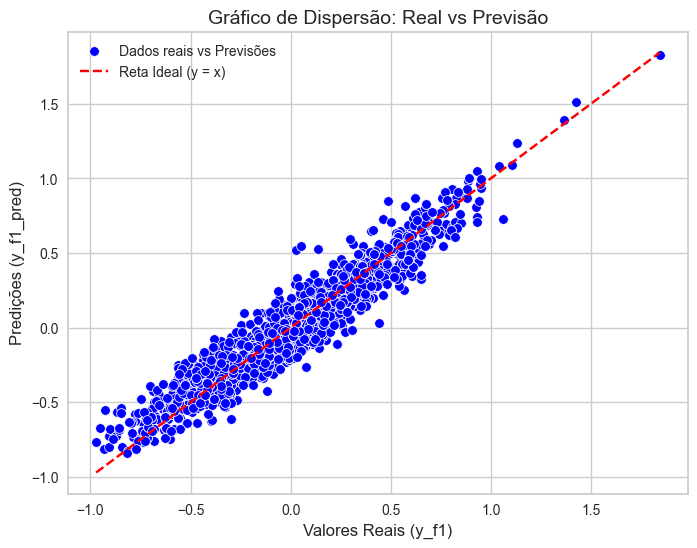

In [459]:
# Exemplo de uso
# y_f1_pred é a variável que contém as predições obtidas pela função de regressão
plot_dispercao(y_f1, y_f1_pred)

In [460]:
y_f2_pred, coefs_f2 = regressao_linear_predict(df_f2, y_f2)

                            OLS Regression Results                            
Dep. Variable:                Fator_2   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     3141.
Date:                sáb, 07 dez 2024   Prob (F-statistic):               0.00
Time:                        14:18:35   Log-Likelihood:                -701.99
No. Observations:                1599   AIC:                             1412.
Df Residuals:                    1595   BIC:                             1433.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.222e-15      0.009  -2.36e-13

In [461]:
len(y_f2_pred)

1599

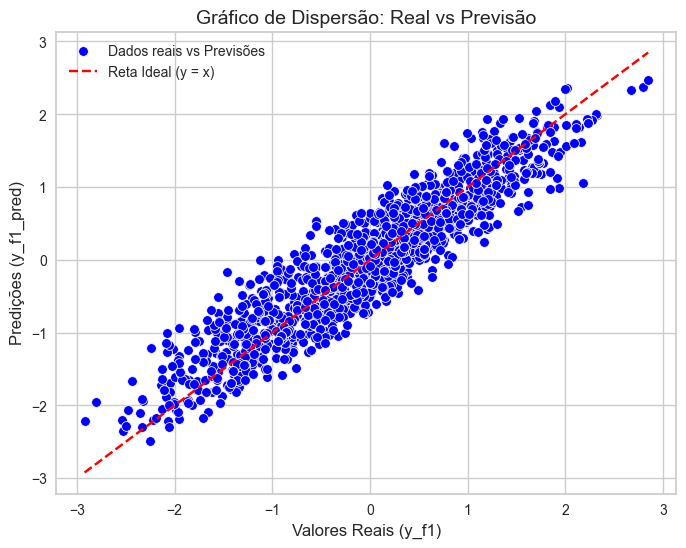

In [462]:
# Exemplo de uso
# y_f1_pred é a variável que contém as predições obtidas pela função de regressão
plot_dispercao(y_f2, y_f2_pred)

In [463]:
y_f3_pred, coefs_f3 = regressao_linear_predict(df_f3, y_f3)

                            OLS Regression Results                            
Dep. Variable:                Fator_3   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     5367.
Date:                sáb, 07 dez 2024   Prob (F-statistic):               0.00
Time:                        14:18:43   Log-Likelihood:                 123.25
No. Observations:                1599   AIC:                            -240.5
Df Residuals:                    1596   BIC:                            -224.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.443e-16      0.006  -7.92e-14      1.0

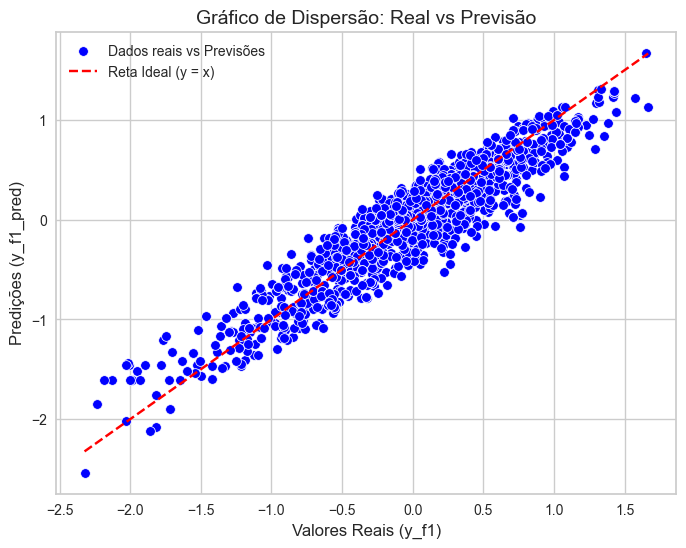

In [464]:
# Exemplo de uso
# y_f1_pred é a variável que contém as predições obtidas pela função de regressão
plot_dispercao(y_f3, y_f3_pred)

In [465]:
y_f4_pred, coefs_f4 = regressao_linear_predict(df_f3, y_f3)

                            OLS Regression Results                            
Dep. Variable:                Fator_3   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     5367.
Date:                sáb, 07 dez 2024   Prob (F-statistic):               0.00
Time:                        14:18:47   Log-Likelihood:                 123.25
No. Observations:                1599   AIC:                            -240.5
Df Residuals:                    1596   BIC:                            -224.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.443e-16      0.006  -7.92e-14      1.0

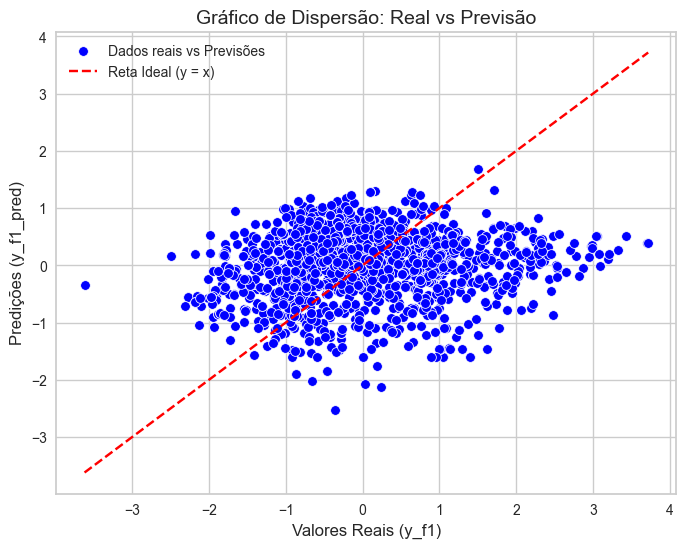

In [466]:
# Exemplo de uso
# y_f1_pred é a variável que contém as predições obtidas pela função de regressão
plot_dispercao(y_f4, y_f4_pred)

**Random Forest**

In [467]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

def random_forest_predict(df_f1, y_f1):
    """
    Realiza a predição utilizando o modelo Random Forest e calcula o MSE e R².

    Parâmetros:
        df_f1 (pd.DataFrame): DataFrame com as variáveis independentes.
        y_f1 (pd.Series ou pd.DataFrame): Variável dependente (target).
    
    Retorna:
        np.ndarray: Predições do modelo para os dados fornecidos.
    """
    # # Alinhar os índices
    # df_f1, y_f1 = df_f1.align(y_f1, join="inner", axis=0)
    # Instanciando o modelo RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Ajustar o modelo
    rf_model.fit(df_f1, y_f1)
    
    # Fazer predições
    predictions = rf_model.predict(df_f1)
    
    # Calcular o MSE (Erro Quadrático Médio)
    mse = mean_squared_error(y_f1, predictions)
    
    # Calcular o R² (Coeficiente de Determinação)
    r2 = r2_score(y_f1, predictions)
    
    # Exibir MSE e R²
    print(f"\nErro Quadrático Médio (MSE): {mse:.4f}")
    print(f"Coeficiente de Determinação (R²): {r2:.4f}")
    
    # Exibir as importâncias das variáveis
    print("\nImportâncias das variáveis:")
    feature_importances = pd.Series(rf_model.feature_importances_, index=df_f1.columns)
    print(feature_importances.sort_values(ascending=False))
    
    return predictions

In [468]:
# Exemplo de uso
# df_f1 e y_f1 devem ser os seus DataFrames/Series com as variáveis independentes e dependentes
y_f1_pred = random_forest_predict(df_f1, y_f1)


Erro Quadrático Médio (MSE): 0.0056
Coeficiente de Determinação (R²): 0.9631

Importâncias das variáveis:
free sulfur dioxide     0.527386
total sulfur dioxide    0.472614
dtype: float64


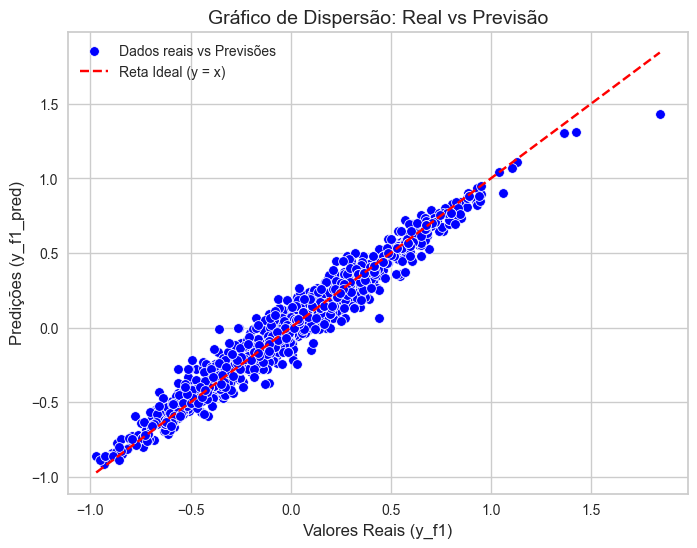

In [469]:
# Exemplo de uso
# y_f1_pred é a variável que contém as predições obtidas pela função de regressão
plot_dispercao(y_f1, y_f1_pred)

In [470]:
# Exemplo de uso
# df_f1 e y_f1 devem ser os seus DataFrames/Series com as variáveis independentes e dependentes
y_f2_pred = random_forest_predict(df_f2, y_f2)


Erro Quadrático Médio (MSE): 0.0160
Coeficiente de Determinação (R²): 0.9836

Importâncias das variáveis:
pH               0.688766
fixed acidity    0.219143
citric acid      0.092091
dtype: float64


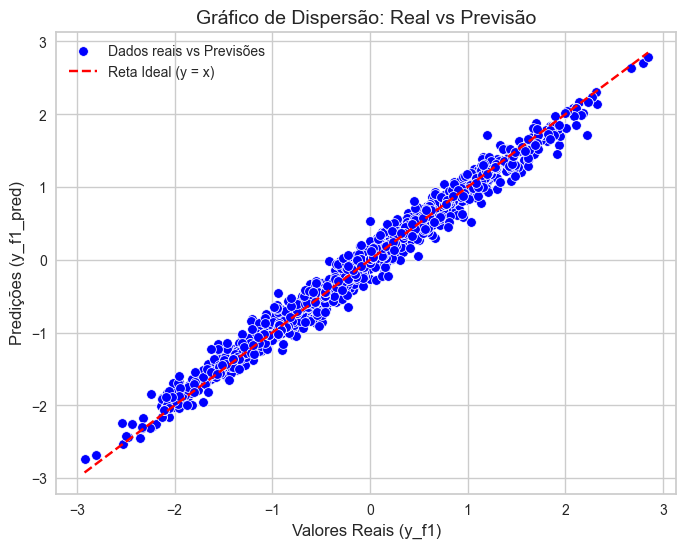

In [471]:
# Exemplo de uso
# y_f1_pred é a variável que contém as predições obtidas pela função de regressão
plot_dispercao(y_f2, y_f2_pred)

In [472]:
# Exemplo de uso
# df_f1 e y_f1 devem ser os seus DataFrames/Series com as variáveis independentes e dependentes
y_f3_pred = random_forest_predict(df_f3, y_f3)


Erro Quadrático Médio (MSE): 0.0103
Coeficiente de Determinação (R²): 0.9733

Importâncias das variáveis:
density    0.600865
alcohol    0.399135
dtype: float64


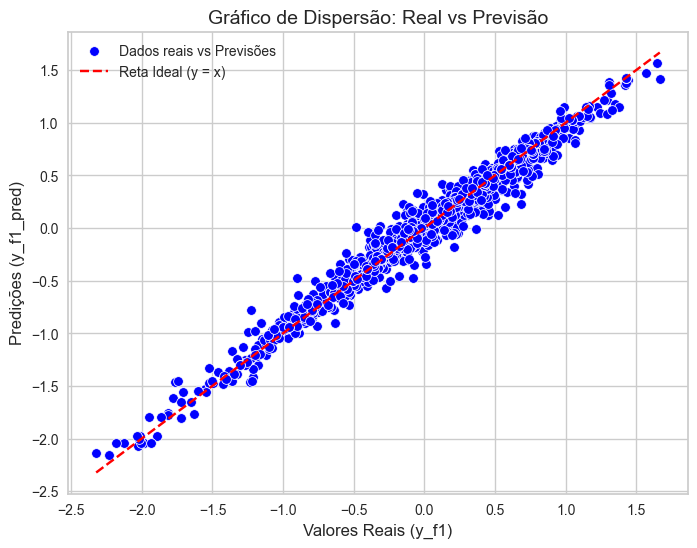

In [473]:
# Exemplo de uso
# y_f1_pred é a variável que contém as predições obtidas pela função de regressão
plot_dispercao(y_f3, y_f3_pred)

In [474]:
# Exemplo de uso
# df_f1 e y_f1 devem ser os seus DataFrames/Series com as variáveis independentes e dependentes
y_f4_pred = random_forest_predict(df_f4, y_f4)


Erro Quadrático Médio (MSE): 0.0513
Coeficiente de Determinação (R²): 0.9527

Importâncias das variáveis:
density           0.814155
residual sugar    0.185845
dtype: float64


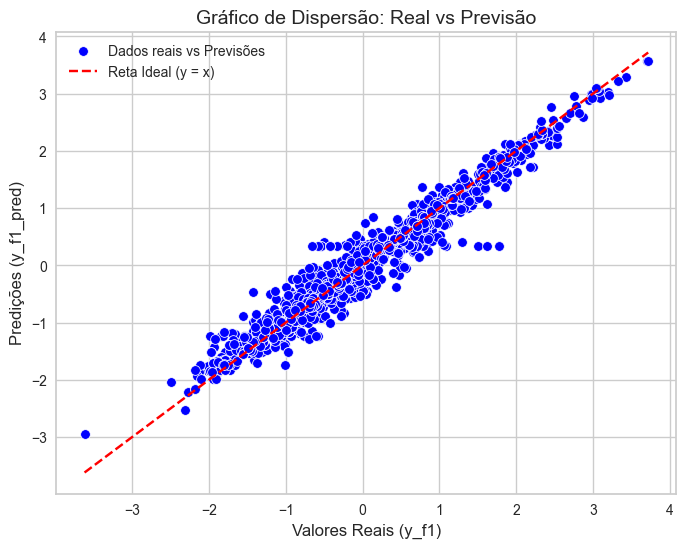

In [475]:
# Exemplo de uso
# y_f1_pred é a variável que contém as predições obtidas pela função de regressão
plot_dispercao(y_f4, y_f4_pred)

**Ranking**

In [476]:
data_autovalores

,Componentes_principais,Autovalor,Var_compartilhada,Var_acumulativa
0,factor_1,2.598989,0.288777,0.288777
1,factor_2,1.948982,0.216554,0.505330
2,factor_3,1.375477,0.152831,0.658161
3,factor_4,1.022868,0.113652,0.771813
4,factor_5,0.846498,0.094055,0.865868
5,factor_6,0.506985,0.056332,0.922200
6,factor_7,0.349240,0.038804,0.961004
7,factor_8,0.200118,0.022235,0.983240
8,factor_9,0.150842,0.016760,1.000000


In [477]:
var1= data_autovalores['Var_compartilhada'].values[0]
var2= data_autovalores['Var_compartilhada'].values[1]
var3= data_autovalores['Var_compartilhada'].values[2]
var4= data_autovalores['Var_compartilhada'].values[3]
var5= data_autovalores['Var_compartilhada'].values[4]
var6= data_autovalores['Var_compartilhada'].values[5]
var7= data_autovalores['Var_compartilhada'].values[6]

In [478]:
ranking = (y_f1_pred*var1+y_f2_pred*var2+y_f3_pred*var3+y_f4_pred*var4)/(var1+var2+var3+var4)
ranking

array([ 0.31389674, -0.02358012,  0.11565329, ...,  0.12308748,
        0.33848033,  0.31813807])

In [479]:
def normalize_ranking(ranking):
    min_val = np.min(ranking)
    max_val = np.max(ranking)
    normalized_ranking = (ranking - min_val) / (max_val - min_val)*100
    return normalized_ranking

In [480]:
ranking = normalize_ranking(ranking)
ranking

array([62.79010512, 47.21271384, 53.63950474, ..., 53.98265505,
       63.92484415, 62.98587779])

In [481]:
vars_selected

{'factor_1': Index(['free sulfur dioxide', 'total sulfur dioxide'], dtype='object'),
 'factor_2': Index(['pH', 'fixed acidity', 'citric acid'], dtype='object'),
 'factor_3': Index(['alcohol', 'density'], dtype='object'),
 'factor_4': Index(['residual sugar', 'density'], dtype='object'),
 'factor_5': Index(['sulphates'], dtype='object'),
 'factor_6': Index([], dtype='object'),
 'factor_7': Index([], dtype='object')}

In [482]:
factor_cols = []
for cols in vars_selected.values():

    factor_cols.extend(cols)  # 'extend' adiciona os elementos individuais à lista

factor_cols = list(set(factor_cols))
factor_cols

['sulphates',
 'density',
 'total sulfur dioxide',
 'citric acid',
 'pH',
 'fixed acidity',
 'free sulfur dioxide',
 'alcohol',
 'residual sugar']

In [483]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
No.,,,,,,,,,,,,
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [484]:
df_wine_rkd = df_wine[factor_cols]
df_wine_rkd['quality']= df_wine['quality']
df_wine_rkd.head()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\3438076835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine_rkd['quality']= df_wine['quality']


,sulphates,density,total sulfur dioxide,citric acid,pH,fixed acidity,free sulfur dioxide,alcohol,residual sugar,quality
No.,,,,,,,,,,
1,0.56,0.9978,34.0,0.00,3.51,7.4,11.0,9.4,1.9,5
2,0.68,0.9968,67.0,0.00,3.20,7.8,25.0,9.8,2.6,5
3,0.65,0.9970,54.0,0.04,3.26,7.8,15.0,9.8,2.3,5
4,0.58,0.9980,60.0,0.56,3.16,11.2,17.0,9.8,1.9,6
5,0.56,0.9978,34.0,0.00,3.51,7.4,11.0,9.4,1.9,5


In [485]:
df_wine_rkd['ranking']= ranking
df_wine_rkd.head()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\2440235433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine_rkd['ranking']= ranking


,sulphates,density,total sulfur dioxide,citric acid,pH,fixed acidity,free sulfur dioxide,alcohol,residual sugar,quality,ranking
No.,,,,,,,,,,,
1,0.56,0.9978,34.0,0.00,3.51,7.4,11.0,9.4,1.9,5,62.790105
2,0.68,0.9968,67.0,0.00,3.20,7.8,25.0,9.8,2.6,5,47.212714
3,0.65,0.9970,54.0,0.04,3.26,7.8,15.0,9.8,2.3,5,53.639505
4,0.58,0.9980,60.0,0.56,3.16,11.2,17.0,9.8,1.9,6,25.778866
5,0.56,0.9978,34.0,0.00,3.51,7.4,11.0,9.4,1.9,5,62.790105


In [486]:
df_wine_rkd.sort_values(by='ranking', ascending=False, inplace=True)
df_wine_rkd

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\627570168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine_rkd.sort_values(by='ranking', ascending=False, inplace=True)


,sulphates,density,total sulfur dioxide,citric acid,pH,fixed acidity,free sulfur dioxide,alcohol,residual sugar,quality,ranking
No.,,,,,,,,,,,
917,0.61,0.99395,62.0,0.19,3.62,5.3,7.0,11.0,1.5,5,100.000000
862,0.60,0.99357,88.0,0.66,3.66,5.8,15.0,11.5,2.0,6,98.164120
1179,0.73,0.99346,78.0,0.00,3.68,5.6,17.0,11.4,2.1,5,96.631669
231,0.62,0.99270,106.0,0.04,3.54,5.2,19.0,12.2,1.6,7,95.439940
803,0.94,0.99264,86.0,0.00,3.56,5.1,14.0,12.9,1.7,7,93.641189
...,...,...,...,...,...,...,...,...,...,...,...
557,0.56,1.00020,17.0,0.49,3.07,10.9,10.0,11.7,4.6,6,3.104389
376,0.83,0.99840,15.0,0.71,3.01,11.5,6.0,11.8,4.4,7,2.058315
510,0.68,0.99860,43.0,0.75,3.04,13.3,23.0,11.4,2.8,7,2.024055


In [487]:
import numpy as np
import pandas as pd

def normalize(df):
    # Iterar sobre as colunas numéricas do DataFrame
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        
        # Calcular os valores mínimo e máximo de cada coluna
        min_val = np.min(df[column])
        max_val = np.max(df[column])
        
        # Aplicar a normalização Min-Max
        df[column] = (df[column] - min_val) / (max_val - min_val) * 100
    
    return df

In [488]:
df_wine_rkd_norm = df_wine[factor_cols]
df_wine_rkd_norm = normalize(df_wine_rkd_norm)
df_wine_rkd_norm['quality']= df_wine['quality']
df_wine_rkd_norm['ranking']= ranking
df_wine_rkd_norm.head()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\4288623073.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - min_val) / (max_val - min_val) * 100
C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\789951230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine_rkd_norm['quality']= df_wine['quality']
C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\789951230.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,sulphates,density,total sulfur dioxide,citric acid,pH,fixed acidity,free sulfur dioxide,alcohol,residual sugar,quality,ranking
No.,,,,,,,,,,,
1,13.772455,56.754772,9.893993,0.0,60.629921,24.778761,14.084507,15.384615,6.849315,5,62.790105
2,20.958084,49.412628,21.554770,0.0,36.220472,28.318584,33.802817,21.538462,11.643836,5,47.212714
3,19.161677,50.881057,16.961131,4.0,40.944882,28.318584,19.718310,21.538462,9.589041,5,53.639505
4,14.970060,58.223201,19.081272,56.0,33.070866,58.407080,22.535211,21.538462,6.849315,6,25.778866
5,13.772455,56.754772,9.893993,0.0,60.629921,24.778761,14.084507,15.384615,6.849315,5,62.790105


In [489]:
df_wine_rkd_norm.sort_values(by='ranking', ascending=False, inplace=True)
df_wine_rkd_norm

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\2281772101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine_rkd_norm.sort_values(by='ranking', ascending=False, inplace=True)


,sulphates,density,total sulfur dioxide,citric acid,pH,fixed acidity,free sulfur dioxide,alcohol,residual sugar,quality,ranking
No.,,,,,,,,,,,
917,16.766467,28.487518,19.787986,19.0,69.291339,6.194690,8.450704,40.000000,4.109589,5,100.000000
862,16.167665,25.697504,28.975265,66.0,72.440945,10.619469,19.718310,47.692308,7.534247,6,98.164120
1179,23.952096,24.889868,25.441696,0.0,74.015748,8.849558,22.535211,46.153846,8.219178,5,96.631669
231,17.365269,19.309838,35.335689,4.0,62.992126,5.309735,25.352113,58.461538,4.794521,7,95.439940
803,36.526946,18.869310,28.268551,0.0,64.566929,4.424779,18.309859,69.230769,5.479452,7,93.641189
...,...,...,...,...,...,...,...,...,...,...,...
557,13.772455,74.375918,3.886926,49.0,25.984252,55.752212,12.676056,50.769231,25.342466,6,3.104389
376,29.940120,61.160059,3.180212,71.0,21.259843,61.061947,7.042254,52.307692,23.972603,7,2.058315
510,20.958084,62.628488,13.074205,75.0,23.622047,76.991150,30.985915,46.153846,13.013699,7,2.024055


**Cluster do Ranking**

In [490]:
!pip install -q kneed
!pip install -q yellowbrick


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [491]:
fator_scores_df

,Fator_1,Fator_2,Fator_3,Fator_4,Fator_5,Fator_6,Fator_7
0,0.270068,1.295207,0.090665,-1.283489,-0.869999,0.187316,-0.668194
1,-0.180421,-0.072267,0.073948,0.201865,-0.341079,0.803894,3.064050
2,0.172947,0.274567,0.031216,-0.428402,0.352995,0.267616,1.412068
3,0.046725,-1.248310,0.234420,-0.636787,-0.810362,-0.700605,1.889568
4,0.270068,1.295207,0.090665,-1.283489,-0.869999,0.187316,-0.668194
...,...,...,...,...,...,...,...
1594,-0.692268,1.198188,0.443755,0.798204,0.412670,0.041039,2.238732
1595,-0.725781,1.591011,-0.112327,1.005508,0.787386,-0.114625,3.128879
1596,-0.624811,1.082217,-0.226035,0.702854,0.615926,0.328964,2.050807
1597,-0.596788,1.844948,0.337257,0.196675,0.286073,0.056426,2.237448


In [492]:
data_fatores = {'Fator_1':y_f1_pred,	'Fator_2':y_f2_pred,	'Fator_3':y_f3_pred,	'Fator_4':y_f4_pred}
fator_scores_df_ = pd.DataFrame(data_fatores)

fator_scores_df_

,Fator_1,Fator_2,Fator_3,Fator_4
0,0.236256,1.309600,0.112537,-1.115275
1,-0.163993,-0.000856,0.136168,0.075077
2,0.180827,0.119768,0.122296,-0.066716
3,0.061374,-1.326302,-0.045080,-0.881749
4,0.236256,1.309600,0.112537,-1.115275
...,...,...,...,...
1594,-0.661584,1.183683,0.499813,0.741165
1595,-0.721566,1.489397,-0.016450,0.996902
1596,-0.634725,1.048560,-0.182471,0.696090
1597,-0.661584,1.660667,0.374667,0.311561


In [493]:
## Aplicando o método do cotovelo (elbow)  para determinar o número de clusters
from sklearn.cluster import KMeans
sse = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state = 42)
    kmeans.fit(fator_scores_df_)
    sse.append(kmeans.inertia_)

sse

[3869.5229068204835,
 2790.4278900619174,
 2077.595221805671,
 1799.5216574255317,
 1553.7627542739965,
 1451.092816479566,
 1309.888652647602,
 1242.3569205023261,
 1145.9320211888758,
 1069.6597791663976]

In [494]:
## elbow
from kneed import KneeLocator
kl = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
cotovelo = kl.elbow
print('O Ponto de cotovelo é:', cotovelo+1)

O Ponto de cotovelo é: 4


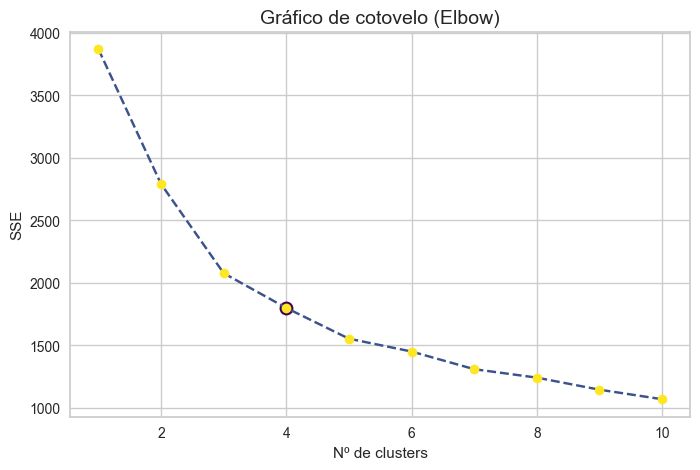

In [495]:
## Plotando o gráfico do cotovelo para determinar o número ideal de clusters.
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions

plt.figure(figsize=(8,5))

# Indicar o ponto de cotovelo
plt.plot(cotovelo+1, sse[cotovelo], marker='o', markersize=10, color='#440154')

# Plotar o gráfico de cotovelo
plt.plot(range(1,11), sse, marker='o', linestyle='--', color='#3b528b', markerfacecolor='#fde725')

plt.title('Gráfico de cotovelo (Elbow)', fontsize=14)
plt.xlabel('Nº de clusters')
plt.ylabel('SSE')

plt.show()

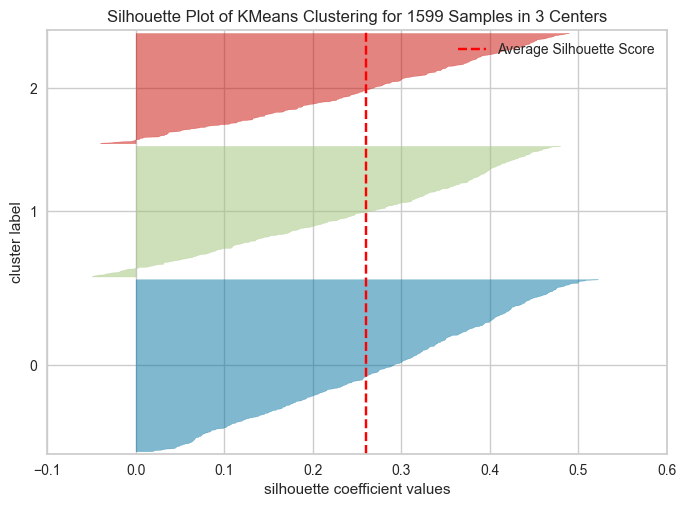

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1599 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [496]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# 1. Criar uma instância do modelo de clusterização (por exemplo, KMeans)
model = KMeans(n_clusters=3)  # Defina o número de clusters desejado

# 2. Criar uma instância do SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# 3. Ajustar o visualizador aos dados
visualizer.fit(fator_scores_df_)  # Substitua X pelos seus dados

# 4. Exibir o gráfico de silhueta
visualizer.show()

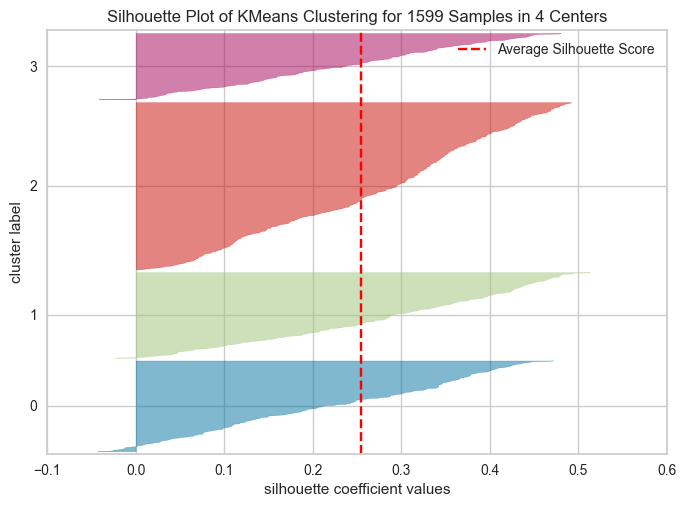

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1599 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [497]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# 1. Criar uma instância do modelo de clusterização (por exemplo, KMeans)
model = KMeans(n_clusters=4)  # Defina o número de clusters desejado

# 2. Criar uma instância do SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# 3. Ajustar o visualizador aos dados
visualizer.fit(fator_scores_df_)  # Substitua X pelos seus dados

# 4. Exibir o gráfico de silhueta
visualizer.show()

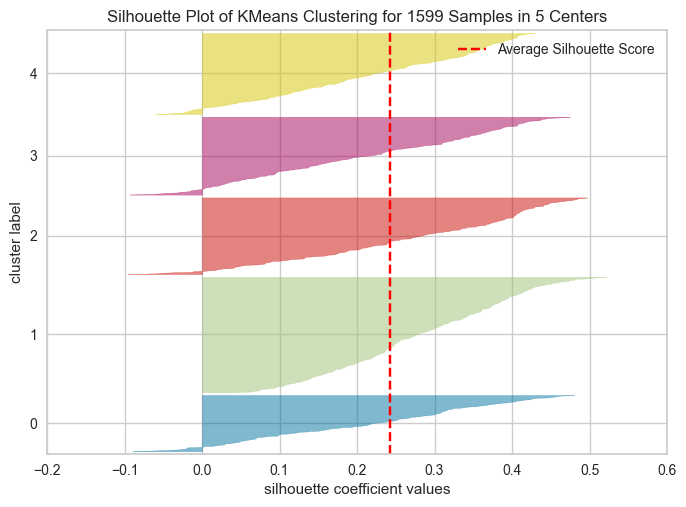

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1599 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [498]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# 1. Criar uma instância do modelo de clusterização (por exemplo, KMeans)
model = KMeans(n_clusters=5)  # Defina o número de clusters desejado

# 2. Criar uma instância do SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# 3. Ajustar o visualizador aos dados
visualizer.fit(fator_scores_df_)  # Substitua X pelos seus dados

# 4. Exibir o gráfico de silhueta
visualizer.show()

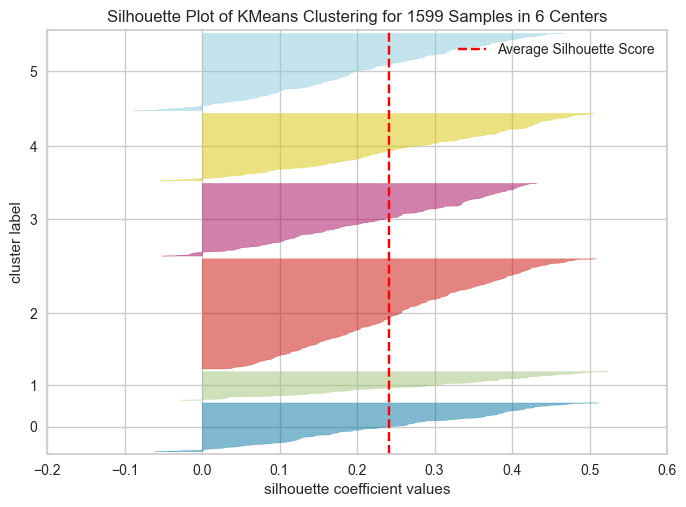

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1599 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [499]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# 1. Criar uma instância do modelo de clusterização (por exemplo, KMeans)
model = KMeans(n_clusters=6)  # Defina o número de clusters desejado

# 2. Criar uma instância do SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

# 3. Ajustar o visualizador aos dados
visualizer.fit(fator_scores_df_)  # Substitua X pelos seus dados

# 4. Exibir o gráfico de silhueta
visualizer.show()

In [500]:
n_clusters = 4

In [501]:
kmeans= KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)

# Compute k-means clustering
kmeans.fit(fator_scores_df_)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(fator_scores_df_)

pred

array([2, 0, 0, ..., 1, 2, 1])

In [502]:
# Extrair os valores dos centroides
centroides = kmeans.cluster_centers_

print(centroides)

[[ 0.07815651  0.0072816   0.42673632 -0.15296729]
 [-0.25187483  0.1931618   0.09132011  1.40319924]
 [ 0.05582414  0.99293205 -0.29640024 -0.52733751]
 [ 0.07933106 -1.21448236 -0.41117594 -0.62038845]]


In [503]:
X_df = fator_scores_df_
X_df['clusters_k5'] = pred
X_df

,Fator_1,Fator_2,Fator_3,Fator_4,clusters_k5
0,0.236256,1.309600,0.112537,-1.115275,2
1,-0.163993,-0.000856,0.136168,0.075077,0
2,0.180827,0.119768,0.122296,-0.066716,0
3,0.061374,-1.326302,-0.045080,-0.881749,3
4,0.236256,1.309600,0.112537,-1.115275,2
...,...,...,...,...,...
1594,-0.661584,1.183683,0.499813,0.741165,1
1595,-0.721566,1.489397,-0.016450,0.996902,1
1596,-0.634725,1.048560,-0.182471,0.696090,1
1597,-0.661584,1.660667,0.374667,0.311561,2


In [504]:
grupos = [f'G{i+1}'for i in range(n_clusters)]
grupos

['G1', 'G2', 'G3', 'G4']

In [505]:
df_centroides = pd.DataFrame(centroides, columns=['Fator_1', 'Fator_2', 'Fator_3', 'Fator_4'])
df_centroides.index = grupos
df_centroides['Grupos'] = grupos
df_centroides

,Fator_1,Fator_2,Fator_3,Fator_4,Grupos
G1,0.078157,0.007282,0.426736,-0.152967,G1
G2,-0.251875,0.193162,0.091320,1.403199,G2
G3,0.055824,0.992932,-0.296400,-0.527338,G3
G4,0.079331,-1.214482,-0.411176,-0.620388,G4


C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\2601775232.py:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data=X_df, x='Fator_1', y='Fator_2', hue='clusters_k5', palette=['#fde725', '#5ec962', '#21918c','#3b528b','#440154'])


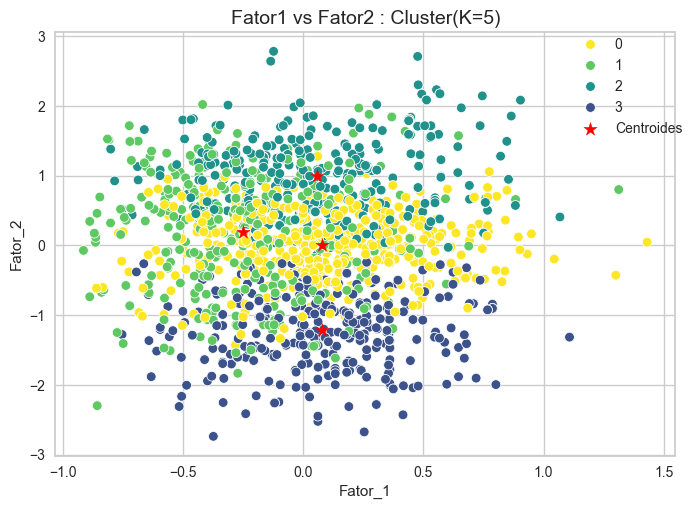

In [506]:
# Título do gráfico
plt.title('Fator1 vs Fator2 : Cluster(K=5)', fontsize=14)

# Scatterplot dos dados dos clientes
sns.scatterplot(data=X_df, x='Fator_1', y='Fator_2', hue='clusters_k5', palette=['#fde725', '#5ec962', '#21918c','#3b528b','#440154'])

# Adicionando os pontos dos centroides
plt.scatter(df_centroides['Fator_1'], df_centroides['Fator_2'], marker='*', s=100, c='red', label='Centroides')

# Adicionando a legenda
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)

# Exibindo o gráfico
plt.show()

In [507]:
df_wine_rkd_norm['cluster_k5'] = pred
df_wine_rkd_norm

,sulphates,density,total sulfur dioxide,citric acid,pH,fixed acidity,free sulfur dioxide,alcohol,residual sugar,quality,ranking,cluster_k5
No.,,,,,,,,,,,,
917,16.766467,28.487518,19.787986,19.0,69.291339,6.194690,8.450704,40.000000,4.109589,5,100.000000,2
862,16.167665,25.697504,28.975265,66.0,72.440945,10.619469,19.718310,47.692308,7.534247,6,98.164120,0
1179,23.952096,24.889868,25.441696,0.0,74.015748,8.849558,22.535211,46.153846,8.219178,5,96.631669,0
231,17.365269,19.309838,35.335689,4.0,62.992126,5.309735,25.352113,58.461538,4.794521,7,95.439940,3
803,36.526946,18.869310,28.268551,0.0,64.566929,4.424779,18.309859,69.230769,5.479452,7,93.641189,2
...,...,...,...,...,...,...,...,...,...,...,...,...
557,13.772455,74.375918,3.886926,49.0,25.984252,55.752212,12.676056,50.769231,25.342466,6,3.104389,1
376,29.940120,61.160059,3.180212,71.0,21.259843,61.061947,7.042254,52.307692,23.972603,7,2.058315,1
510,20.958084,62.628488,13.074205,75.0,23.622047,76.991150,30.985915,46.153846,13.013699,7,2.024055,1


**Análise dos clusters**

In [508]:
df_wine_rkd.columns

Index(['sulphates', 'density', 'total sulfur dioxide', 'citric acid', 'pH',
       'fixed acidity', 'free sulfur dioxide', 'alcohol', 'residual sugar',
       'quality', 'ranking'],
      dtype='object')

In [509]:
cols= ['sulphates', 'density', 'total sulfur dioxide', 'citric acid', 'pH',
       'fixed acidity', 'free sulfur dioxide', 'alcohol', 'residual sugar']

In [510]:
df_wine_rkd_= df_wine_rkd_norm[['sulphates', 'density', 'total sulfur dioxide', 'citric acid', 'pH',
       'fixed acidity', 'free sulfur dioxide', 'alcohol', 'residual sugar', 'cluster_k5']]
df_wine_rkd_.head()

,sulphates,density,total sulfur dioxide,citric acid,pH,fixed acidity,free sulfur dioxide,alcohol,residual sugar,cluster_k5
No.,,,,,,,,,,
917,16.766467,28.487518,19.787986,19.0,69.291339,6.194690,8.450704,40.000000,4.109589,2
862,16.167665,25.697504,28.975265,66.0,72.440945,10.619469,19.718310,47.692308,7.534247,0
1179,23.952096,24.889868,25.441696,0.0,74.015748,8.849558,22.535211,46.153846,8.219178,0
231,17.365269,19.309838,35.335689,4.0,62.992126,5.309735,25.352113,58.461538,4.794521,3
803,36.526946,18.869310,28.268551,0.0,64.566929,4.424779,18.309859,69.230769,5.479452,2


In [511]:
import pandas as pd

# Supondo que você tenha o DataFrame df já carregado, podemos fazer o agrupamento da seguinte forma:

# Agrupar pelo Cluster_K5 e calcular as médias das colunas específicas
media_por_cluster =df_wine_rkd_.groupby('cluster_k5')[cols].mean()
media_por_cluster

,sulphates,density,total sulfur dioxide,citric acid,pH,fixed acidity,free sulfur dioxide,alcohol,residual sugar
cluster_k5,,,,,,,,,
0,20.266364,48.193861,14.945236,27.149425,46.001146,32.397518,20.862339,32.096964,10.832284
1,20.602176,52.632831,12.609366,32.588732,40.621049,38.843325,20.519738,31.694475,11.865715
2,18.686254,49.130037,13.948860,26.090659,45.799083,32.546436,20.484445,30.862919,12.314655
3,18.785334,46.535246,15.390765,22.600559,46.933973,28.175211,21.980486,29.399799,10.052996


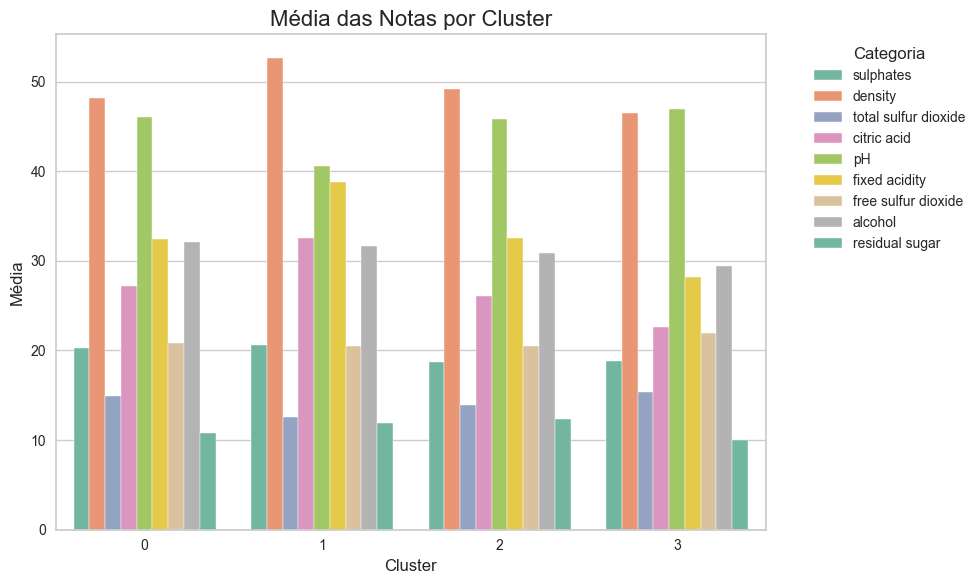

In [512]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Resetando o índice para o gráfico
media_por_cluster_reset = media_por_cluster.reset_index()

# Criar o gráfico de barras usando o seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=media_por_cluster_reset.melt(id_vars='cluster_k5', var_name='Categoria', value_name='Média'),
            x='cluster_k5', y='Média', hue='Categoria', palette='Set2')

# Personalizar o gráfico
plt.title('Média das Notas por Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Média', fontsize=12)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Exibir o gráfico
plt.show()

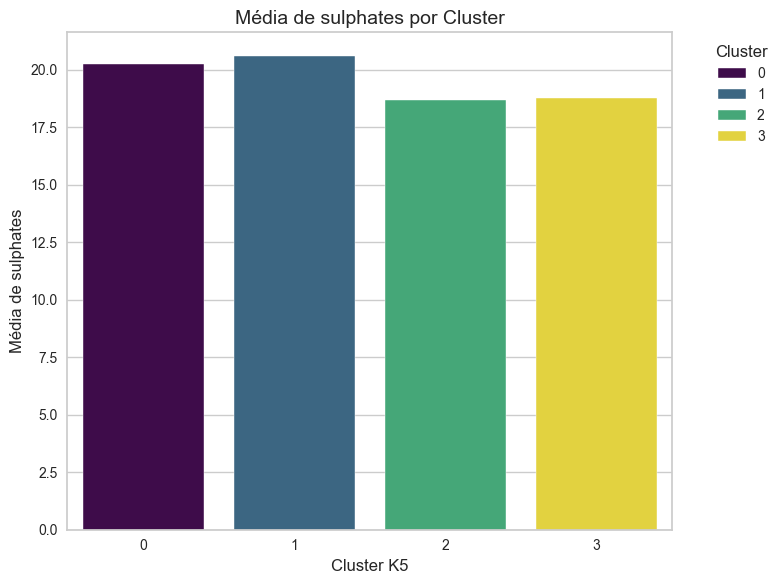

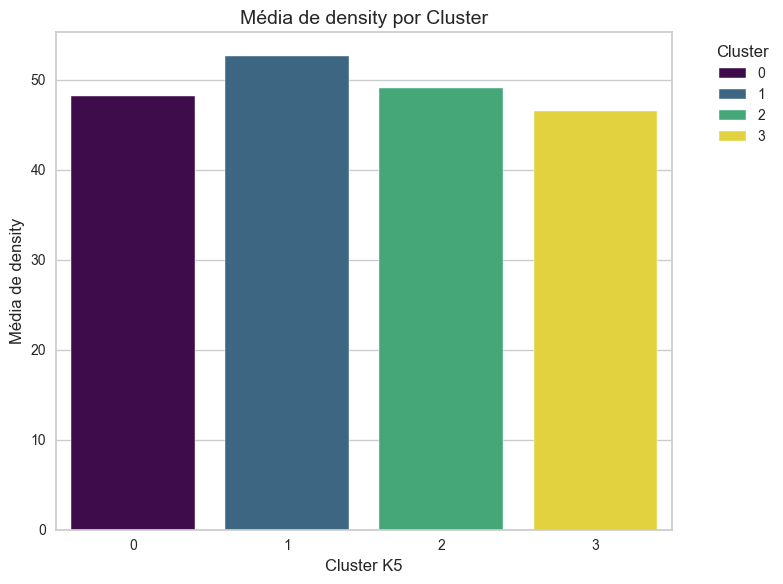

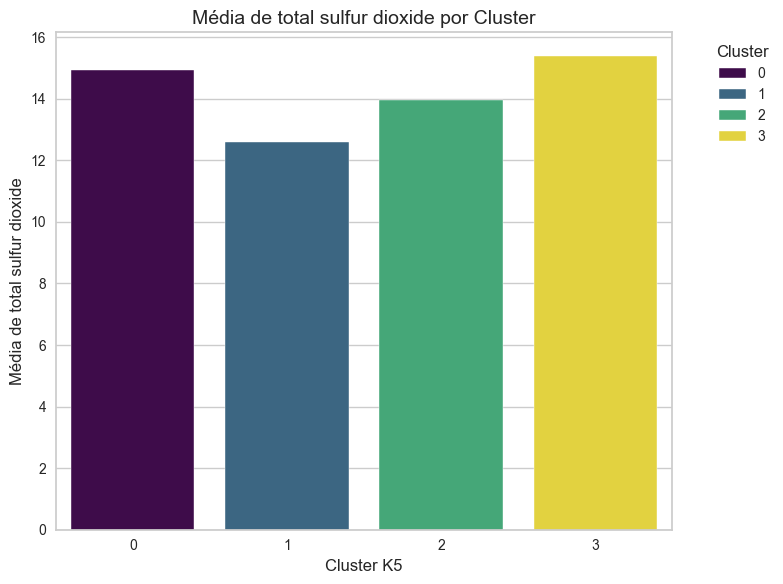

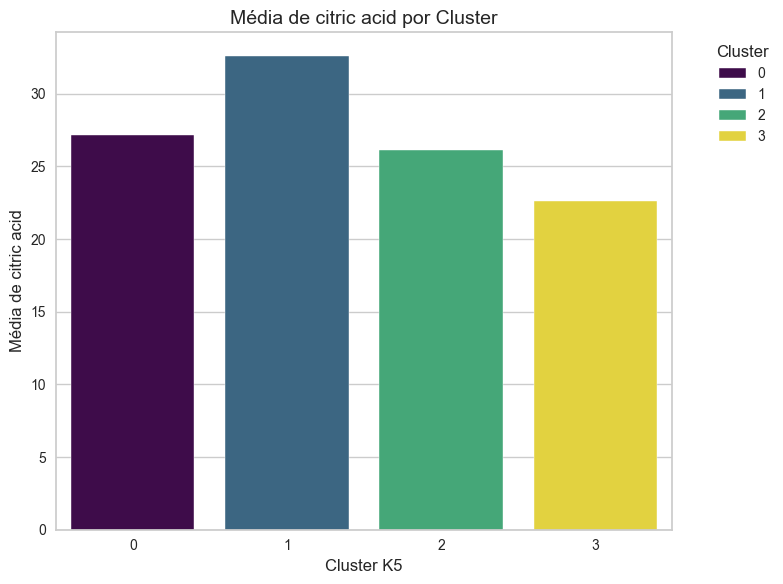

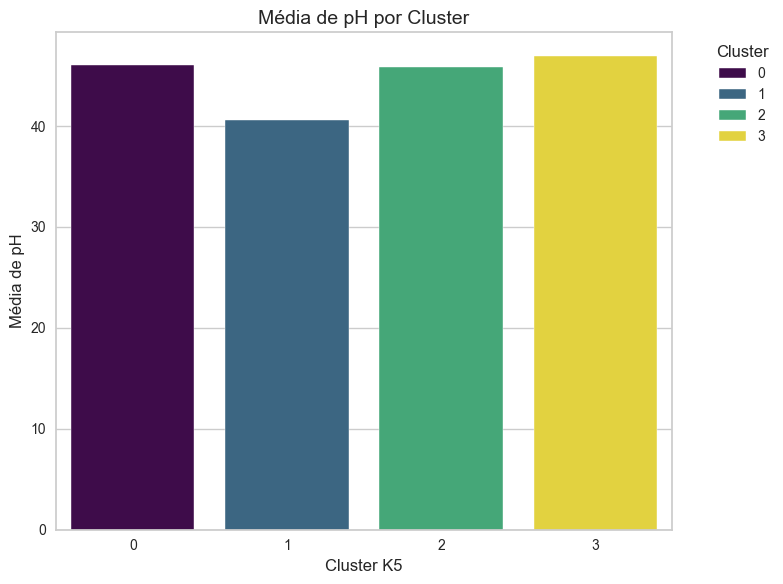

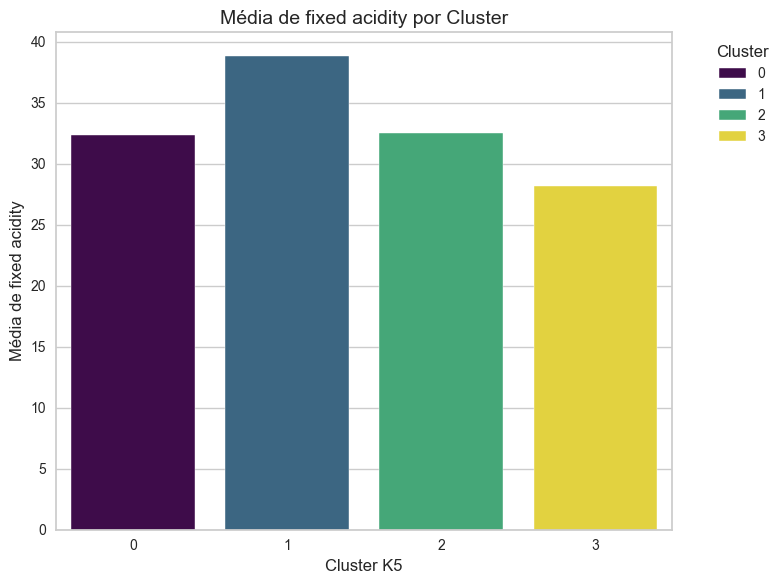

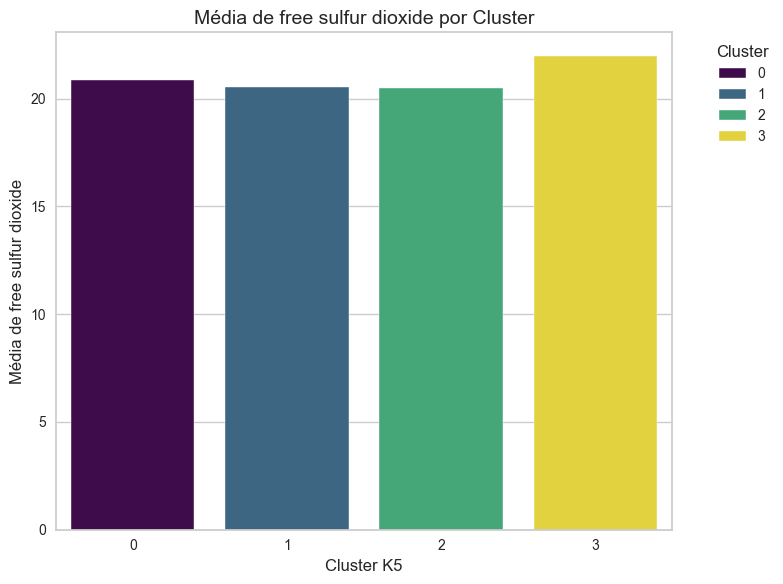

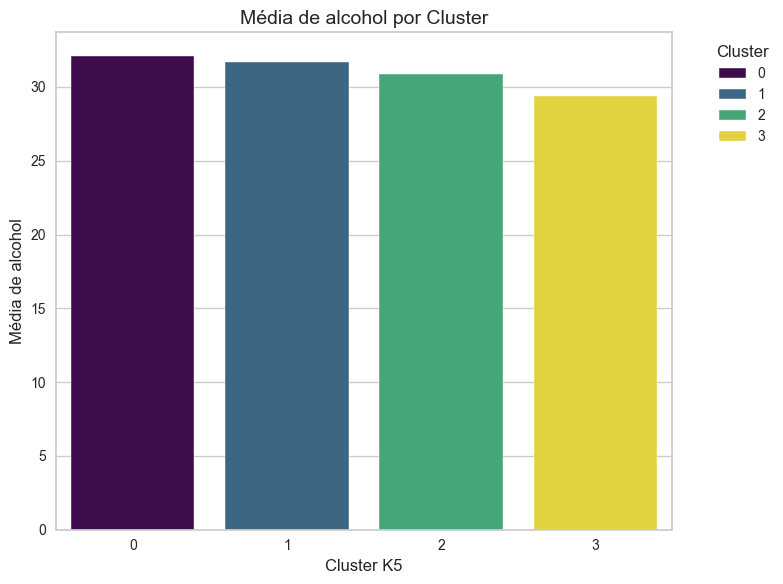

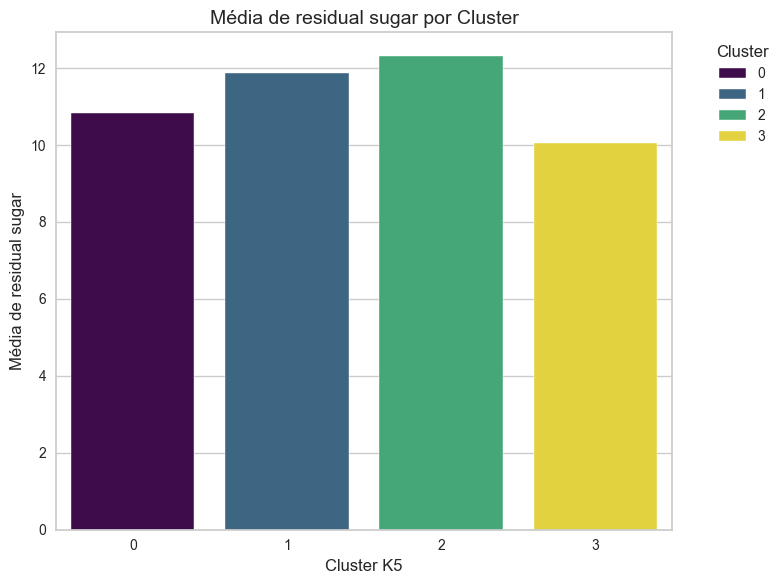

In [513]:
import matplotlib.pyplot as plt
import seaborn as sns

# Listar as colunas que você quer plotar (as colunas numéricas)
colunas_para_plotar = ['sulphates', 'density', 'total sulfur dioxide', 'citric acid', 'pH',
       'fixed acidity', 'free sulfur dioxide', 'alcohol', 'residual sugar']

# Criar um gráfico separado para cada coluna
for coluna in colunas_para_plotar:
    plt.figure(figsize=(8, 6))  # Definindo o tamanho da figura para cada gráfico
    
    # Criar gráfico de barras com seaborn, usando 'hue' para separar por cluster
    sns.barplot(x='cluster_k5', y=coluna, data=media_por_cluster, hue='cluster_k5', palette='viridis')
    
    # Adicionar título e rótulos
    plt.title(f'Média de {coluna} por Cluster', fontsize=14)
    plt.xlabel('Cluster K5', fontsize=12)
    plt.ylabel(f'Média de {coluna}', fontsize=12)
    # Adicionar a legenda fora da área de plotagem
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Exibir o gráfico
    plt.tight_layout()
    plt.show()

**Predição da Qualidade pelos Fatores** 

In [525]:
data_fatores = {'Fator_1':y_f1_pred,	'Fator_2':y_f2_pred,	'Fator_3':y_f3_pred,	'Fator_4':y_f4_pred}
fator_scores_df_ = pd.DataFrame(data_fatores)
fator_scores_df_['quality']= df_wine['quality'].values
fator_scores_df_

,Fator_1,Fator_2,Fator_3,Fator_4,quality
0,0.236256,1.309600,0.112537,-1.115275,5
1,-0.163993,-0.000856,0.136168,0.075077,5
2,0.180827,0.119768,0.122296,-0.066716,5
3,0.061374,-1.326302,-0.045080,-0.881749,6
4,0.236256,1.309600,0.112537,-1.115275,5
...,...,...,...,...,...
1594,-0.661584,1.183683,0.499813,0.741165,5
1595,-0.721566,1.489397,-0.016450,0.996902,6
1596,-0.634725,1.048560,-0.182471,0.696090,6
1597,-0.661584,1.660667,0.374667,0.311561,5


In [527]:
# Ajuste as classes para um intervalo desejado (por exemplo, de 0 a 5)
y_train_adjusted = fator_scores_df_['quality'].values- 3  # Supondo que as classes originais sejam 3 a 8

# Verifique as classes ajustadas
print(y_train_adjusted)

[2 2 2 ... 3 2 3]


In [528]:
fator_scores_df_['quality_'] = y_train_adjusted

In [ ]:
# # Converter a coluna para categórica
# df['coluna'] = df['coluna'].astype('category')

# # Converter a coluna para categórica
# df['coluna'] = pd.Categorical(df['coluna'])

In [529]:
# Converter a coluna para categórica
fator_scores_df_['quality_'] = pd.Categorical(fator_scores_df_['quality_'])

In [530]:
X=np.array(fator_scores_df_.iloc[:,:-2])
y=np.array(fator_scores_df_.iloc[:,-1])

In [531]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [532]:
import xgboost as xgb
xgbm = xgb.XGBClassifier(max_depth=50)
xgbm.fit(X_train, y_train)
model_score=xgbm.score(X_train, y_train)
print("Score:",model_score)

Score: 1.0


In [533]:
y_pred=xgbm.predict(X_test)
y_pred

array([3, 2, 2, 4, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       4, 2, 2, 2, 4, 2, 3, 3, 2, 4, 3, 2, 2, 2, 3, 3, 2, 2, 2, 4, 3, 3,
       3, 2, 2, 2, 3, 2, 2, 4, 2, 4, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2,
       3, 3, 2, 5, 2, 3, 2, 3, 4, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 3, 3, 2, 4, 3, 3, 3, 1, 4, 3, 3, 3, 2, 2, 2, 2, 4,
       2, 2, 2, 4, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 2, 3, 3,
       2, 3, 4, 3, 3, 2, 4, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 4, 2, 3, 3, 3,
       3, 3, 4, 2, 2, 3, 2, 5, 4, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 3, 1, 3, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       2, 2, 3, 3, 3, 4, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 3, 4, 3, 3, 4,
       3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       3, 2, 3, 3, 2, 3, 2, 4, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3,
       3, 2, 2, 2, 2, 3, 4, 3, 2, 3, 3, 2, 2, 3, 2, 2, 4, 4, 3, 2, 2, 2,
       3, 4, 4, 3, 2, 1, 2, 3, 2, 3, 3, 2, 3, 2, 3,

In [539]:
prediction=pd.DataFrame(np.round(y_pred))
pred_column=["prediction"]
prediction.columns=pred_column
y_test=pd.DataFrame(y_test)
test_column=["Correct Label"]
y_test.columns=test_column
y_test=y_test.reset_index()
y_test=y_test.iloc[:,[1]]
df_pred=pd.concat([y_test,prediction], axis=1)
df_pred

,Correct Label,prediction
0,3,3
1,2,2
2,2,2
3,3,4
4,2,2
...,...,...
475,4,4
476,2,2
477,3,3
478,4,3


In [536]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Correct Label  480 non-null    int64
 1   prediction     480 non-null    int64
dtypes: int64(2)
memory usage: 7.6 KB


In [540]:
df_pred= df_pred +3
df_pred

,Correct Label,prediction
0,6,6
1,5,5
2,5,5
3,6,7
4,5,5
...,...,...
475,7,7
476,5,5
477,6,6
478,7,6


In [541]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(df_pred['Correct Label'], df_pred['prediction'])
print("Matriz de Confusão:\n", conf_matrix)



Matriz de Confusão:
 [[  0   0   2   0   0   0]
 [  0   1  11   4   0   0]
 [  0   2 133  73   6   0]
 [  0   1  49 125  10   0]
 [  0   0   9  19  28   2]
 [  0   0   1   3   1   0]]


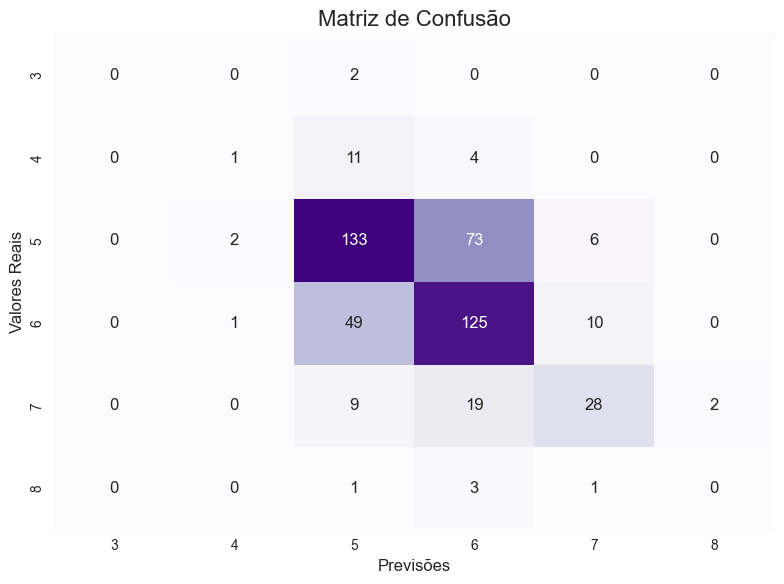

In [545]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_pred['Correct Label'], df_pred['prediction'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False, 
            xticklabels=list(set(df_pred['Correct Label'].values)), 
            yticklabels=list(set(df_pred['Correct Label'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [547]:
# Calcular a acurácia
accuracy = accuracy_score(df_pred['Correct Label'], df_pred['prediction'])
print("Acurácia:", np.round(accuracy,4)*100)



Acurácia: 59.79


In [548]:
# Obter o classification report
class_report = classification_report(df_pred['Correct Label'], df_pred['prediction'])
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.06      0.10        16
           5       0.65      0.62      0.63       214
           6       0.56      0.68      0.61       185
           7       0.62      0.48      0.54        58
           8       0.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.35      0.31      0.31       480
weighted avg       0.59      0.60      0.59       480



c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [ ]:
v

**Predição da Qualidade pelos Fatores** 

In [ ]:
data_fatores = {'Fator_1':y_f1_pred,	'Fator_2':y_f2_pred,	'Fator_3':y_f3_pred,	'Fator_4':y_f4_pred}
fator_scores_df_ = pd.DataFrame(data_fatores)
fator_scores_df_['quality']= df_wine['quality'].values
fator_scores_df_

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\2313367197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fator_scores_df_['quality']= df_wine['quality'].values


,Fator_1,Fator_2,Fator_3,Fator_4,quality
0,0.270068,1.295207,0.090665,-1.283489,5
1,-0.180421,-0.072267,0.073948,0.201865,5
2,0.172947,0.274567,0.031216,-0.428402,5
3,0.046725,-1.248310,0.234420,-0.636787,6
4,0.270068,1.295207,0.090665,-1.283489,5
...,...,...,...,...,...
1594,-0.692268,1.198188,0.443755,0.798204,5
1595,-0.725781,1.591011,-0.112327,1.005508,6
1596,-0.624811,1.082217,-0.226035,0.702854,6
1597,-0.596788,1.844948,0.337257,0.196675,5


In [551]:
# Ajuste as classes para um intervalo desejado (por exemplo, de 0 a 5)
y_train_adjusted = fator_scores_df_['quality'].values- 3  # Supondo que as classes originais sejam 3 a 8

# Verifique as classes ajustadas
print(y_train_adjusted)

[2 2 2 ... 3 2 3]


In [552]:
fator_scores_df_['quality_'] = y_train_adjusted

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\3805056288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fator_scores_df_['quality_'] = y_train_adjusted


In [553]:
# # Converter a coluna para categórica
# df['coluna'] = df['coluna'].astype('category')

# # Converter a coluna para categórica
# df['coluna'] = pd.Categorical(df['coluna'])

In [554]:
# Converter a coluna para categórica
fator_scores_df_['quality_'] = pd.Categorical(fator_scores_df_['quality_'])

C:\Users\Pichau\AppData\Local\Temp\ipykernel_29404\665742194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fator_scores_df_['quality_'] = pd.Categorical(fator_scores_df_['quality_'])


In [555]:
X=np.array(fator_scores_df_.iloc[:,:-2])
y=np.array(fator_scores_df_.iloc[:,-1])

In [556]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [567]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# 1. Treinando o modelo Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [568]:
# 2. Fazendo as previsões
y_pred = rf_classifier.predict(X_test)
y_pred

array([3, 2, 3, 3, 2, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       4, 2, 2, 2, 4, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 4, 2, 2, 2, 4, 2, 3,
       3, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 3, 2, 2, 1, 2, 3, 2, 2, 2, 3, 2,
       3, 2, 2, 3, 2, 3, 2, 3, 4, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2,
       3, 2, 2, 3, 2, 4, 4, 2, 4, 3, 2, 3, 3, 4, 2, 3, 3, 2, 2, 2, 2, 4,
       2, 3, 2, 4, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 4, 3, 3, 2, 2, 3,
       2, 3, 3, 3, 2, 2, 4, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 4,
       3, 3, 4, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4,
       2, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 4,
       3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2,
       3, 3, 3, 2, 2, 4, 2, 4, 3, 2, 3, 2, 2, 4, 3, 2, 2, 2, 2, 2, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 4, 2, 2, 2, 2,
       3, 3, 4, 4, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3,

In [569]:
prediction=pd.DataFrame(np.round(y_pred))
pred_column=["prediction"]
prediction.columns=pred_column
y_test=pd.DataFrame(y_test)
test_column=["Correct Label"]
y_test.columns=test_column
y_test=y_test.reset_index()
y_test=y_test.iloc[:,[1]]
df_pred=pd.concat([y_test,prediction], axis=1)
df_pred

,Correct Label,prediction
0,3,3
1,2,2
2,2,3
3,3,3
4,2,2
...,...,...
475,4,4
476,2,2
477,3,3
478,4,3


In [570]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Correct Label  480 non-null    int64
 1   prediction     480 non-null    int64
dtypes: int64(2)
memory usage: 7.6 KB


In [571]:
df_pred= df_pred +3
df_pred

,Correct Label,prediction
0,6,6
1,5,5
2,5,6
3,6,6
4,5,5
...,...,...
475,7,7
476,5,5
477,6,6
478,7,6


In [572]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(df_pred['Correct Label'], df_pred['prediction'])
print("Matriz de Confusão:\n", conf_matrix)



Matriz de Confusão:
 [[  0   0   2   0   0   0]
 [  0   1   9   6   0   0]
 [  0   1 138  70   5   0]
 [  0   0  59 120   6   0]
 [  0   0   4  27  27   0]
 [  0   0   0   3   2   0]]


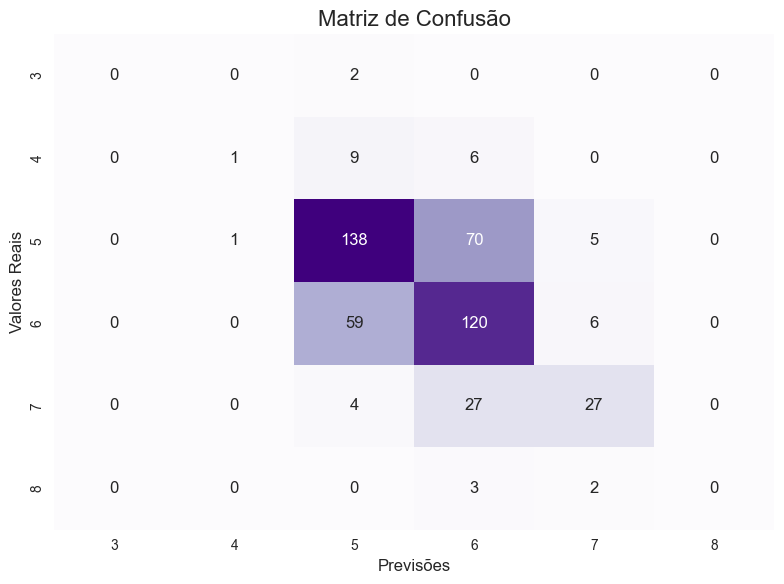

In [573]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_pred['Correct Label'], df_pred['prediction'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False, 
            xticklabels=list(set(df_pred['Correct Label'].values)), 
            yticklabels=list(set(df_pred['Correct Label'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [574]:
# Calcular a acurácia
accuracy = accuracy_score(df_pred['Correct Label'], df_pred['prediction'])
print("Acurácia:", np.round(accuracy,4)*100)



Acurácia: 59.58


In [576]:
!pip install -q tensorflow 

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.0-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   -----------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [603]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Construção da Rede Neural
model = Sequential()

# Camada de entrada (input layer) com 64 neurônios e função de ativação ReLU
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Camada oculta com 32 neurônios e função de ativação ReLU
model.add(Dense(32, activation='relu'))

# Camada de saída (output layer) com o número de classes e função de ativação softmax
model.add(Dense(len(np.unique(y)), activation='softmax'))

# 3. Compilação do Modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [604]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,598 (10.15 KB)

 Trainable params: 2,598 (10.15 KB)

 Non-trainable params: 0 (0.00 B)

In [606]:
import numpy as np
import tensorflow as tf
import random

# Definir semente para reprodutibilidade
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [607]:
# 4. Treinamento
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3938 - loss: 1.7139 - val_accuracy: 0.5188 - val_loss: 1.4452
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5357 - loss: 1.3822 - val_accuracy: 0.5354 - val_loss: 1.1807
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5495 - loss: 1.1481 - val_accuracy: 0.5562 - val_loss: 1.1010
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5535 - loss: 1.0713 - val_accuracy: 0.5688 - val_loss: 1.0748
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5756 - loss: 1.0453 - val_accuracy: 0.5750 - val_loss: 1.0614
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5734 - loss: 1.0312 - val_accuracy: 0.5792 - val_loss: 1.0521
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5711 - loss: 1.0214 - val_accuracy: 0.5854 - val_loss: 1.0449
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5774 - loss: 1.0139 - val_accuracy: 0.5771 - val_loss: 1.0392
Epo

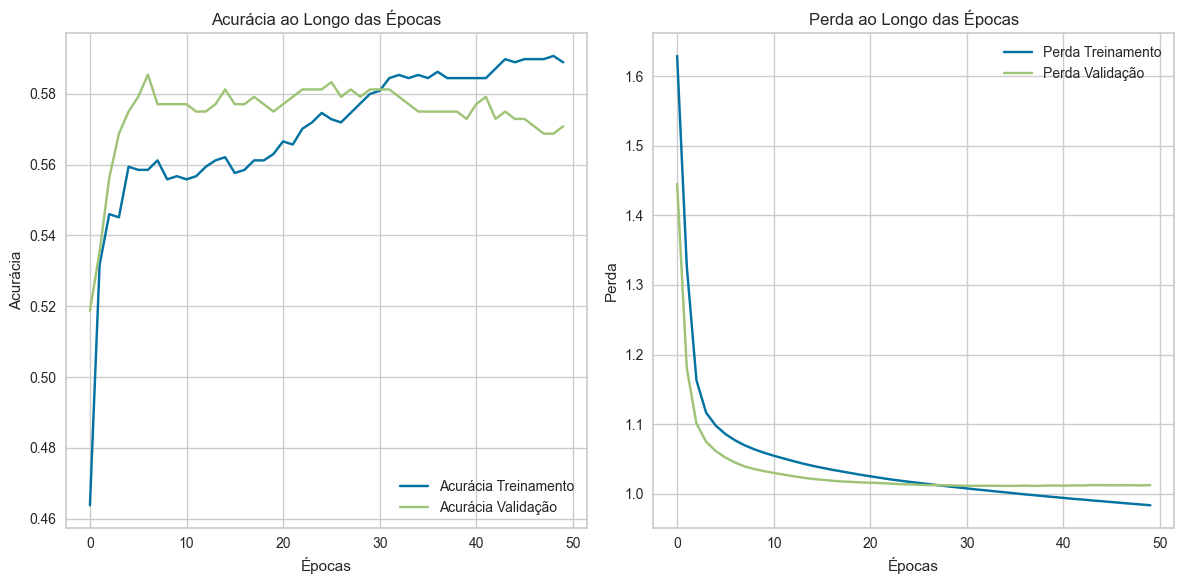

In [608]:
import matplotlib.pyplot as plt

# Gráfico de Acurácia
plt.figure(figsize=(12, 6))

# Plotando a acurácia de treino e de validação
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Gráfico de Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Exibir os gráficos
plt.tight_layout()
plt.show()


In [609]:
# 5. Avaliação
# Previsões no conjunto de teste
y_pred = np.argmax(model.predict(X_test), axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [610]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.4f}')

Acurácia do modelo: 0.5708


In [611]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[  0   0   2   0   0   0]
 [  0   0  10   6   0   0]
 [  0   0 156  55   3   0]
 [  0   0  75 101   9   0]
 [  0   0   5  36  17   0]
 [  0   0   0   5   0   0]]


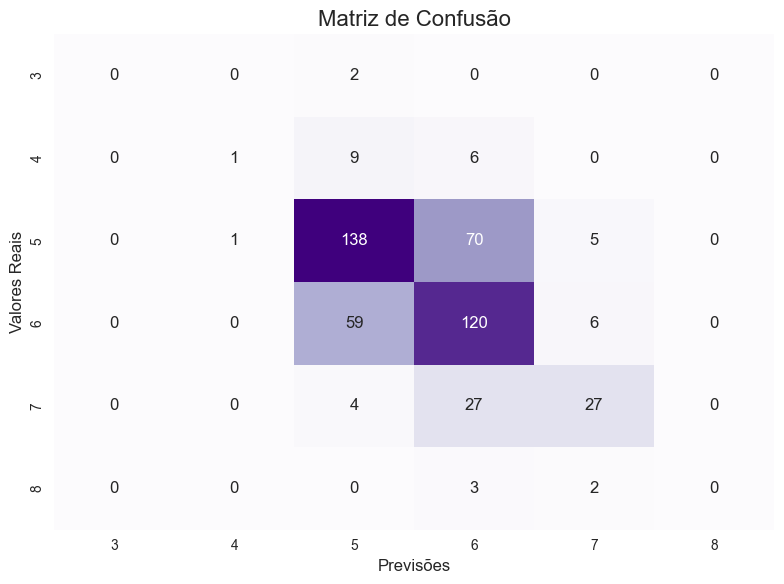

In [612]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(df_pred['Correct Label'], df_pred['prediction'])

# Plotar o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False, 
            xticklabels=list(set(df_pred['Correct Label'].values)), 
            yticklabels=list(set(df_pred['Correct Label'].values)))

# Adicionar título e rótulos aos eixos
plt.title('Matriz de Confusão', fontsize=16)
plt.xlabel('Previsões', fontsize=12)
plt.ylabel('Valores Reais', fontsize=12)

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [613]:

# Relatório de Classificação
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        16
           2       0.63      0.73      0.68       214
           3       0.50      0.55      0.52       185
           4       0.59      0.29      0.39        58
           5       0.00      0.00      0.00         5

    accuracy                           0.57       480
   macro avg       0.29      0.26      0.26       480
weighted avg       0.54      0.57      0.55       480



c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,